# Electronic Products and Pricing Data

Se ha obtenido una lista con más de 7000 registros de visitas a productos electrónicos que proviene de la base de datos de ``Datafiniti``. Debido a que es una base de datos de productos de pago, sólo se ha podido obtener una muestra de la información, no consiguiendo el listado de productos total original. 

¿Qué es lo que encontramos en el listado? Los principales datos proporcionados son:
* ID del producto.
* Precio máximo que ha tenido el producto.
* Precio mínimo que ha tenido el producto.
* La disponibilidad en tienda del producto.
* La condición.
* La moneda que utilizan los precios mostrados.
* La fecha de visualización de los precios.
* El tipo de envío que proporciona la tienda.
* La tienda con el enlace a compra.
* Nombre de la tienda donde se han podido ver los precios.
* Fecha de inscripción y actualización del producto.
* La marca, fabricante y código de producto.
* Categorías principales del producto.
* Peso del producto.
* Web de donde se ha obtenido información sobre el producto.

¿Cuáles han sido las motivaciones principales para el uso de estos datos? La industria de los productos electrónicos es un mercado con un gran crecimiento en los últimos años. Estas herramientas se han convertido en indispensables en nuestro día a día, haciéndonos trabajar de una forma más eficiente. Es por estas razones que existe la necesidad de encontrar aquellos productos de interés al mejor precio, sin renunciar a marcas y tiendas de confianza. Así, en este análisis realizado a los productos electrónicos más visitados desde 2014 a 2018, se pretende descubrir:
* ¿Cuáles son los productos que más despiertan el interés de los usuarios?
* ¿Qué rangos de precios tienen los productos que visitan los clientes?
* ¿Qué categorías de productos son más populares?
* ¿Cuáles son las condiciones de disponibilidad, estado y envío que prefieren los clientes en base a su precio?
* Finalmente, ¿qué tiendas son las más populares y si existen diferentes rangos de precio preferidos para productos dentro de cada tienda?

¿Cuáles son los pasos que se han llevado a cabo para la realización de dicho análisis?
* Primero se ha hecho un análisis inicial de los datos y un preprocesamiento de los mismos, donde se han utilizado aquellas columnas de mayor interés, se han hecho categorías nuevas que agrupan de una forma más clara las ya existentes y se ha utilizado un modelo de clasificación para predecir los datos faltantes dentro de la columna envío, en base al resto de datos ya preprocesados.
* Seguidamente, se ha realizado un análisis de los datos presentados en el dataset y se han estudiado posibles teorías a las que se han llegado a partir de los mismos.
* Como tercer paso, se ha hecho un estudio de los precios medios de los artículos visitados mensualmente por los clientes para tratar de predecir el comportamiento de los precios medios de artículos en función de las visitas.
* Finalmente, se ha realizado un modelo de clasificación que permite predecir la tienda que más se ajusta a las necesidades del cliente, en función de ciertas características clave.

Principales problemas encontrados a la hora de la realización del análisis:
* El dataset obtenido a partir de la página data.world es una muestra perteneciente a una base de datos mayor, por lo que el principal desafío a la hora de analizar los productos visitados, ha sido la información faltante, no permitiendo analizar de una forma más precisa los precios y tipos de productos visitados por los clientes, en cierto espacio de tiempo.
* La columna envío se ha considerado un dato de interés ya que permite analizar una de las caracteríscticas que tienen los productos más visitados por clientes, comprendiendo así sus preferencias a la hora de encontrar el producto perfecto. No obstante, dentro de la columna había más de un 40% de datos faltantes, lo cuál se ha intentado solventar a partir de un modelo de clasificación para facilitar el análisis de los productos visitados.
* Ya que sólo se tienen ciertos productos visitados en determinadas fechas, a la hora de realizar el análisis de los precios medios de los productos visitados en función de los meses, se han tenido que aproximar ciertos valores, lo cuál no proporcionaría una predicción muy exacta de como esos precios van a evolucionar en el futuro.
* Para poder realizar un modelo de clasificación en base a las necesidades de los clientes, se ha tenido que crear una nueva columna de categorías de productos, que permita al usuario determinar de una forma más concreta a qué categoría pertenece el producto que está buscando.
* Finalmente, tras la implementación del modelo de clasificación, no se ha podido obtener un accuracy alto en la preddicción debido a que serían necesarios más datos para poder determinar con exactitud aquellas tiendas que se adaptan a diferentes necesidades de los clientes.

# Importo librerías

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import plotly_express as px
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from neuralprophet import NeuralProphet
import seaborn as sns
from pmdarima.arima import auto_arima
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import random
import warnings
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pycaret.classification import *

c:\Users\Russhi\Desktop\BOOTCAMP\venv_analytics\lib\site-packages\plotly_resampler\aggregation\aggregators.py:25: UserWarning: Could not import lttbc; will use a (slower) python alternative.
  warnings.warn("Could not import lttbc; will use a (slower) python alternative.")


# Vistazo inicial

In [13]:
df=pd.read_csv(r'C:\Users\Russhi\Desktop\BOOTCAMP\Module3_0_ProyectoFinal\DatafinitiElectronicsProductsPricingData.csv',header=0, sep=',')

In [14]:
pd.set_option('display.max_columns', None)

In [15]:
df.head()

id  prices.amountMax  prices.amountMin  \
0  AVphzgbJLJeJML43fA0o            104.99            104.99   
1  AVpgMuGwLJeJML43KY_c             69.00             64.99   
2  AVpgMuGwLJeJML43KY_c             69.00             69.00   
3  AVpgMuGwLJeJML43KY_c             69.99             69.99   
4  AVpgMuGwLJeJML43KY_c             66.99             66.99   

  prices.availability prices.condition prices.currency  \
0                 Yes              New             USD   
1            In Stock              New             USD   
2            In Stock              New             USD   
3                 Yes              New             USD   
4                 Yes              New             USD   

                                     prices.dateSeen  prices.isSale  \
0  2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...          False   
1                               2017-12-14T06:00:00Z           True   
2                               2017-09-08T05:00:00Z          False   
3                               2017-10-10T05:00:00Z          False   
4                               2017-08-28T07:00:00Z          False   

  prices.merchant prices.shipping  \
0     Bestbuy.com             NaN   
1     Walmart.com       Expedited   
2     Walmart.com       Expedited   
3     Bestbuy.com             NaN   
4     Bestbuy.com             NaN   

                                   prices.sourceURLs                  asins  \
0  http://www.bestbuy.com/site/sanus-tv-wall-moun...             B00C78VIUE   
1  https://www.walmart.com/ip/BOYTONE-BT210FB-BLA...  B018K251JE,B00VILQKQ8   
2  https://www.walmart.com/ip/Boytone-BT-210F-Blu...  B018K251JE,B00VILQKQ8   
3  https://www.bestbuy.com/site/boytone-2500w-2-1...  B018K251JE,B00VILQKQ8   
4  https://www.bestbuy.com/site/boytone-2500w-2-1...  B018K251JE,B00VILQKQ8   

     brand                                         categories  \
0    Sanus  Audio & Video Accessories,TV Mounts,TV Accesso...   
1  Boytone  Stereos,Portable Bluetooth Speakers,TV, Video ...   
2  Boytone  Stereos,Portable Bluetooth Speakers,TV, Video ...   
3  Boytone  Stereos,Portable Bluetooth Speakers,TV, Video ...   
4  Boytone  Stereos,Portable Bluetooth Speakers,TV, Video ...   

              dateAdded           dateUpdated  ean  \
0  2015-04-13T12:00:51Z  2018-05-12T18:59:48Z  NaN   
1  2015-05-18T14:14:56Z  2018-06-13T19:39:02Z  NaN   
2  2015-05-18T14:14:56Z  2018-06-13T19:39:02Z  NaN   
3  2015-05-18T14:14:56Z  2018-06-13T19:39:02Z  NaN   
4  2015-05-18T14:14:56Z  2018-06-13T19:39:02Z  NaN   

                                           imageURLs  \
0  https://images-na.ssl-images-amazon.com/images...   
1  https://images-na.ssl-images-amazon.com/images...   
2  https://images-na.ssl-images-amazon.com/images...   
3  https://images-na.ssl-images-amazon.com/images...   
4  https://images-na.ssl-images-amazon.com/images...   

                                                keys manufacturer  \
0  sanusvlf410b110inchsuperslimfullmotionmountfor...          NaN   
1  boytone2500w21chhometheatersystemblackdiamond/...      Boytone   
2  boytone2500w21chhometheatersystemblackdiamond/...      Boytone   
3  boytone2500w21chhometheatersystemblackdiamond/...      Boytone   
4  boytone2500w21chhometheatersystemblackdiamond/...      Boytone   

  manufacturerNumber                                               name  \
0           VLF410B1  Sanus VLF410B1 10-Inch Super Slim Full-Motion ...   
1            BT-210F  Boytone - 2500W 2.1-Ch. Home Theater System - ...   
2            BT-210F  Boytone - 2500W 2.1-Ch. Home Theater System - ...   
3            BT-210F  Boytone - 2500W 2.1-Ch. Home Theater System - ...   
4            BT-210F  Boytone - 2500W 2.1-Ch. Home Theater System - ...   

  primaryCategories                                         sourceURLs  \
0       Electronics  https://www.amazon.com/Sanus-VLF410B1-10-Inch-...   
1       Electronics  http://reviews.bestbuy.com/3545/4784804/review...   
2       Electronics  http:/

In [16]:
df.shape

(7249, 31)

Se presenta un dataset que contiene el registro de precios de diferentes artículos y diferentes tiendas de donde se han visitado los mismos, que cuenta con 7249 filas y 31 columnas.

# Preprocesamiento

## Duplicados

In [17]:
duplicates=df.duplicated()
num_duplicates=duplicates.sum()
if duplicates.any():
    print("Se han encontrado duplicados en el DataFrame.")
    print('Hay un total de', num_duplicates, 'valores duplicados en el DataFrame.')
else:
    print("No hay duplicados en el DataFrame.")

No hay duplicados en el DataFrame.


No se han encontrado valores duplicados.

## Valores nulos

In [18]:
missing_data = df.isnull().sum(axis = 0)
missing_data = missing_data[missing_data>0] 
missing_data.sort_values(ascending = False) 

Unnamed: 28        7243
Unnamed: 30        7243
Unnamed: 29        7237
Unnamed: 27        7231
Unnamed: 26        7210
ean                5706
manufacturer       4014
prices.shipping    2972
dtype: int64

In [19]:
missing_data_percentage = missing_data/len(df)*100
missing_data_percentage.sort_values(ascending = False)

Unnamed: 28        99.917230
Unnamed: 30        99.917230
Unnamed: 29        99.834460
Unnamed: 27        99.751690
Unnamed: 26        99.461995
ean                78.714305
manufacturer       55.373155
prices.shipping    40.998758
dtype: float64

In [20]:
df.drop(['manufacturer','ean','Unnamed: 26','Unnamed: 27','Unnamed: 28','Unnamed: 29','Unnamed: 30'],axis=1,inplace=True)

Se han ecnontrado ocho columnas que contienen datos faltantes, cinco de ellas, con más de un 99%. Se procede a eliminar estas columnas, incluyendo la columna manufacturer, cuyos datos coinciden en su mayoría con la columna brand, por lo que no sería necesaria para el análisis. En el caso de la columna de envío, que contenía más de un 40% de datos faltantes, se ha decidido que es de interés a la hora de analizar las características de los productos visitados, por lo que no va a ser eliminada. 

## Columna envios

In [21]:
df['prices.shipping'].unique()

array([nan, 'Expedited', 'Value', 'Standard', 'Free Shipping',
       'Free Shippingon orders 35 and up', 'Free Expedited Shipping',
       'Free Shipping on orders 35 and up',
       'Free Expedited Shipping for most orders over $49', 'FREE',
       'Freight', 'Free Shipping for this Item', 'USD 7.95', 'USD 7.25',
       'USD 26.09', 'USD 10.00',
       'Free Standard Shipping on Orders Over $49', 'Free Delivery',
       'USD 11.30', 'USD 15.42', 'USD 35.03', 'USD 0.99',
       'Shipping Charges Apply', 'USD 60.00', 'USD 15.68', 'USD 5.99',
       'USD 196.92', 'USD 22.64', 'USD 20.00', 'USD 13.32', 'USD 12.78',
       'USD 13.25', 'USD 25.00', 'USD 6.65', 'USD 2.85', 'USD 7.81',
       'USD 10.10', 'USD 75.00', 'USD 13.95', 'Free Standard Shipping',
       'USD 20.55', 'USD 18.60', 'USD 11.75', 'USD 25.76', 'USD 27.94',
       'USD 14.00', 'USD 13.60', 'USD 5.00', 'USD 13.61', 'USD 3.99',
       'USD 7.50', 'USD 2.99', 'USD 12.21', 'USD 3.39', 'USD 22.13',
       'USD 6.00', 'USD 4.8

In [22]:
nuevo_estado=['Free Expedited Shipping','Free Standard Shipping', 'Minimum Order Free Shipping', 'Paid Shipping']
df['estado_lower']=df['prices.shipping'].str.lower()
df['Envios']=np.nan
for i,w in enumerate(df['estado_lower']):
    if pd.isna(w):
        continue
    else:
        if (('usd' in w) or ('cad' in w) or ('shipping charges apply' in w) or ('freight' in w)):
            df.loc[i,'Envios']=nuevo_estado[3]
        elif (('orders' in w) or ('next day' in w)):
            df.loc[i,'Envios']=nuevo_estado[2]
        elif ('expedited' in w) or ('value' in w):
            df.loc[i,'Envios']=nuevo_estado[0]
        else:
            df.loc[i,'Envios']=nuevo_estado[1]

Se han encontrado muchos tipos de envíos diferentes para los productos listados. Muchos de ellos pertenecerían a la misma categoría, por lo que se ha decidido agrupar todos ellos en cuatro categorías nuevas distintas, que permiten englobar las plasmadas en la columna original.

## Columna disponibilidad

In [23]:
df['prices.availability'].unique()

array(['Yes', 'In Stock', 'TRUE', 'undefined', 'yes', 'Out Of Stock',
       'Special Order', 'No', 'More on the Way', 'sold', 'FALSE',
       'Retired', '32 available', '7 available'], dtype=object)

In [24]:
nuevo_estado=['In Stock','Out of Stock', 'More on the Way', 'Retired','Special Order', 'Low Stock']
df['estado_lower']=df['prices.availability'].str.lower()
df['Disponibilidad']=None
for i,w in enumerate(df['estado_lower']):
    if (('yes' in w) or ('in stock' in w) or ('true' in w)):
        df.loc[i,'Disponibilidad']=nuevo_estado[0]
    elif (('no' in w) or ('out of stock' in w) or ('sold' in w) or ('false' in w) or ('undefined' in w)):
        df.loc[i,'Disponibilidad']=nuevo_estado[1]
    elif ('more on the way' in w):
        df.loc[i,'Disponibilidad']=nuevo_estado[2]
    elif ('retired' in w):
        df.loc[i,'Disponibilidad']=nuevo_estado[3]
    elif  ('special' in w):
        df.loc[i,'Disponibilidad']=nuevo_estado[4]
    else:
        df.loc[i,'Disponibilidad']=nuevo_estado[5]

Para el caso de la disponibilidad de los productos, encontramos diferentes categorías que se refieren a la misma. Por ello, se corrigen, para disminuir el número de categorías existentes.

## Columna estado

In [25]:
df['prices.condition'].unique()

array(['New', 'new', 'Seller refurbished', 'Used', 'pre-owned',
       'Refurbished', 'Manufacturer refurbished',
       'New other (see details)', 'refurbished',
       'New Kicker BT2 41IK5BT2V2 Wireless Bluetooth USB Audio System Black + Remote, Power Supply (volts, ampere): 24, 2.9, Square Reflex Subwoofer (in., mm): 6 x 6", Stereo Amp Power with DSP (watts): 50, App for customizing - KickStart, Remote Control Included, Height x Width x Depth (in, mm): 8.87" x 19" x 9.14", Frequency Response (Hz): 24-20k, +-3dB, Woofer (in., cm): 5", 1 Year Manufacturer Warranty, Item Weight: 13.85 lbs., USB Port, Compatible with: Bluetooth-enabled devices, Aux-in, Speaker Design: 2-Way Full-Range, Bluetooth wireless streaming, Condition: Brand New!, Tweeter (in., cm): 3/4"',
       '5/16" Ring Terminal, 3 ft. 8 GA Black Ground Cable, 6 ft. Split Loom Tubing, Depth: 6.5" (165mm) (top) 11.2" (285mm) (bottom), Item Weight: 18.5 lbs., Frequency Response 25Hz - 500Hz, Line Output, Max Power: 1100 Watt 

In [26]:
nuevo_estado=['New', 'Refurbished', 'Used']
df['estado_lower']=df['prices.condition'].str.lower()
df['Estado']=None
for i,w in enumerate(df['estado_lower']):
    if ('new' in w):
        df.loc[i,'Estado']=nuevo_estado[0]
    elif ('refurbished' in w):
        df.loc[i,'Estado']=nuevo_estado[1]
    else:
        df.loc[i,'Estado']=nuevo_estado[2]

In [27]:
df['Estado'].unique()

array(['New', 'Refurbished', 'Used'], dtype=object)

Se corrige la categoría de estado del producto, para que no se repita la misma categoría con diferente nombre.

## Columna fecha visto

In [28]:
df[['prices.dateSeen']].T

0     \
prices.dateSeen  2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...   

                                 1                     2     \
prices.dateSeen  2017-12-14T06:00:00Z  2017-09-08T05:00:00Z   

                                 3                     4     \
prices.dateSeen  2017-10-10T05:00:00Z  2017-08-28T07:00:00Z   

                                 5                     6     \
prices.dateSeen  2017-10-24T04:00:00Z  2017-08-15T15:00:00Z   

                                 7                     8     \
prices.dateSeen  2017-08-12T09:00:00Z  2017-09-14T21:00:00Z   

                                 9                     10    \
prices.dateSeen  2018-01-21T08:00:00Z  2018-05-26T07:00:00Z   

                                 11    \
prices.dateSeen  2017-07-23T00:00:00Z   

                                                              12    \
prices.dateSeen  2017-08-01T03:00:00Z,2017-07-26T15:00:00Z,2017...   

                                 13                    14    \
prices.dateSeen  2018-05-26T16:00:00Z  2015-03-25T22:00:00Z   

                                 15                    16    \
prices.dateSeen  2014-10-27T00:00:00Z  2015-04-23T09:00:00Z   

                                                              17    \
prices.dateSeen  2017-10-10T12:00:00Z,2017-09-12T05:00:00Z,2017...   

                                                              18    \
prices.dateSeen  2017-08-01T00:00:00Z,2017-08-01T17:00:00Z,2017...   

                                                      19    \
prices.dateSeen  2017-06-01T17:00:00Z,2017-06-01T19:00:00Z   

                                 20                    21    \
prices.dateSeen  2018-05-26T06:00:00Z  2018-05-26T06:00:00Z   

                                                              22    \
prices.dateSeen  2017-10-10T20:00:00Z,2017-09-18T13:00:00Z,2017...   

                                 23                    24    \
prices.dateSeen  2018-01-18T12:00:00Z  2015-07-02T05:00:00Z   

                                                              25    \
prices.dateSeen  2017-10-10T19:00:00Z,2017-09-06T17:00:00Z,2017...   

                                                              26    \
prices.dateSeen  2018-07-25T22:00:00Z,2017-12-06T21:00:00Z,2017...   

                                 27    \
prices.dateSeen  2015-03-10T19:00:00Z   

                                                      28    \
prices.dateSeen  2017-03-10T22:00:00Z,2017-03-04T10:00:00Z   

                                 29                    30    \
prices.dateSeen  2017-03-30T06:00:00Z  2018-05-26T07:00:00Z   

                                                              31    \
prices.dateSeen  2017-10-10T22:00:00Z,2017-09-12T03:00:00Z,2017...   

                                                              32    \
prices.dateSeen  2017-10-10T22:00:00Z,2017-09-12T03:00:00Z,2017...   

                                                              33    \
prices.dateSeen  2018-01-12T10:00:00Z,2018-05-04T11:00:00Z,2018...   

                                                              34    \
prices.dateSeen  2017-10-10T05:00:00Z,2017-09-06T17:00:00Z,2017...   

                                                              35    \
prices.dateSeen  2017-11-18T10:00:00Z,2017-08-29T04:00:00Z,2017...   

                                 36    \
prices.dateSeen  2017-08-28T18:00:00Z   

                                                              37    \
prices.dateSeen  2017-12-06T22:00:00Z,2017-12-06T21:00:00Z,2017...   

                                 38                    39    \
prices.dateSeen  2018-05-26T13:00:00Z  2018-05-26T13:00:00Z   

                                                      40    \
prices.dateSeen  2017-07-31T23:00:00Z,2017-07-26T21:00:00Z   

                                 41                    42    \
prices.dateSeen  2017-10-10T13:00:00Z  2018-05-26T08:00:00Z   

                                 43                    44    \
prices.dateSeen  2

In [29]:
df['Fecha precios vistos']=df['prices.dateSeen'].str.split('[,]',regex=True).str[0]

In [30]:
for i,v in enumerate(df['Fecha precios vistos']):
    df.loc[i,'Fecha precios vistos']=pd.to_datetime(v,format='mixed')

Se corrigen aquellas fechas que contienen más de una fecha para un producto visitado y se cambia el tipo de dato.

## Columna store

In [31]:
df[['prices.sourceURLs']].T

0     \
prices.sourceURLs  http://www.bestbuy.com/site/sanus-tv-wall-moun...   

                                                                1     \
prices.sourceURLs  https://www.walmart.com/ip/BOYTONE-BT210FB-BLA...   

                                                                2     \
prices.sourceURLs  https://www.walmart.com/ip/Boytone-BT-210F-Blu...   

                                                                3     \
prices.sourceURLs  https://www.bestbuy.com/site/boytone-2500w-2-1...   

                                                                4     \
prices.sourceURLs  https://www.bestbuy.com/site/boytone-2500w-2-1...   

                                                                5     \
prices.sourceURLs  https://www.walmart.com/ip/Boytone-BT-210F-Blu...   

                                                                6     \
prices.sourceURLs  https://www.walmart.com/ip/Boytone-BT-210F-Blu...   

                                                                7     \
prices.sourceURLs  http://www.bestbuy.com/site/boytone-2500w-2-1-...   

                                                                8     \
prices.sourceURLs  https://www.walmart.com/ip/Boytone-BT-210F-Blu...   

                                                                9     \
prices.sourceURLs  https://www.walmart.com/ip/BOYTONE-BT210FB-BLA...   

                                                                10    \
prices.sourceURLs  https://www.bestbuy.com/site/boytone-2500w-2-1...   

                                                                11    \
prices.sourceURLs  https://www.walmart.com/ip/Boytone-BT-210F-Blu...   

                                                                12    \
prices.sourceURLs  http://www.bestbuy.com/site/boytone-2500w-2-1-...   

                                                                13    \
prices.sourceURLs  https://www.bestbuy.com/site/denaq-ac-adapter-...   

                                                                14    \
prices.sourceURLs  http://www.walmart.com/ip/Denaq-Denaq-3.16A-19...   

                                                                15    \
prices.sourceURLs  http://www.bestbuy.com/site/denaq-ac-adapter-f...   

                                                                16    \
prices.sourceURLs  http://www.walmart.com/ip/Denaq-Denaq-3.16A-19...   

                                                                17    \
prices.sourceURLs  https://www.bestbuy.com/site/denaq-ac-adapter-...   

                                                                18    \
prices.sourceURLs  http://www.bestbuy.com/site/dreamwave-tremor-p...   

                                                                19    \
prices.sourceURLs  http://www.bestbuy.com/site/dreamwave-tremor-p...   

                                                                20    \
prices.sourceURLs  https://www.bestbuy.com/site/dreamwave-tremor-...   

                                                                21    \
prices.sourceURLs  https://www.bestbuy.com/site/dreamwave-tremor-...   

                                                                22    \
prices.sourceURLs  https://www.bestbuy.com/site/dreamwave-tremor-...   

                                                                23    \
prices.sourceURLs  https://www.walmart.com/ip/Yamaha-NS-SP1800BL-...   

                                                                24    \
prices.sourceURLs  http://www.bestbuy.com/site/yamaha-5-1-600-w-h...   

                                                                25    \
prices.sourceURLs  https://www.bestbuy.com/site/yamaha-5-1-600-w-...   

                                                                26    \
prices.sourceURLs  https://www.bhphotovideo.com/c/product/567876-...   

                                                                27    \
prices.sourceURLs  http://www.bestbuy.com/site/yamaha-5-1-600-w-h...   

    

In [32]:
df['Tienda Precio']=df['prices.sourceURLs'].apply(lambda x: x.split('.')[1] if ((x.startswith('http://www.')) or (x.startswith('https://www.'))) else x.split('//')[1])

In [33]:
for i in df.index:
    if df.loc[i,'Tienda Precio']=='autoplicity.com/950027-go-pro-roll-bar-mount-14in-to25in':
        df.loc[i,'Tienda Precio']='autoplicity'
    else:
        continue

In [34]:
df['Tienda Precio'].unique()

array(['bestbuy', 'walmart', 'bhphotovideo', 'ebay', 'autoplicity'],
      dtype=object)

Dado que en la columna merchant se obtenían diferentes proveedores de productos dentro de la misma tienda, se ha decidido crear una nueva columna que muestre la tienda de la cuál proceden los productos visitados, a partir de la url del producto.

## Columna Categorías

In [35]:
new_categories=['Audio and accessories', 'TV and accessories', 'Wireless Tech', 'Computer and accessories', 'Phones and accessories', 'Electronics']

In [36]:
df['Categoria Principal']=None
for i,v in enumerate(df['categories']):
    if ('TV' in v) or ('LED' in v):
        df.loc[i,'Categoria Principal']=new_categories[1]
    elif ('Wireless' in v) or ('Bluetooth' in v):
        df.loc[i,'Categoria Principal']=new_categories[2]
    elif ('Phone' in v) or ('Cell Phone' in v) or ('Phones' in v):
        df.loc[i,'Categoria Principal']=new_categories[4]
    elif ('Audio' in v) or ('Stereo' in v) or ('Speakers' in v):
        df.loc[i,'Categoria Principal']=new_categories[0]
    elif ('Computer' in v) or ('Computers' in v):
        df.loc[i,'Categoria Principal']=new_categories[3]
    else:
        df.loc[i,'Categoria Principal']=new_categories[5]

In [37]:
df['Categoria Principal'].unique()

array(['TV and accessories', 'Computer and accessories', 'Wireless Tech',
       'Audio and accessories', 'Phones and accessories', 'Electronics'],
      dtype=object)

Las categorías que engloban a cada producto tienen nombres muy largos que no facilitan la identificación de datos de interés, por lo que se ha decidio crear una nueva columna de categorías más legible.

## Columna fecha añadida

In [38]:
df['Fecha añadido']=df['dateAdded'].str.split('[,]',regex=True).str[0]

In [39]:
for i,v in enumerate(df['Fecha añadido']):
    df.loc[i,'Fecha añadido']=pd.to_datetime(v,format='mixed')

In [40]:
df[['Fecha añadido']].T

0                         1     \
Fecha añadido 2015-04-13 12:00:51+00:00 2015-05-18 14:14:56+00:00   

                                   2                         3     \
Fecha añadido 2015-05-18 14:14:56+00:00 2015-05-18 14:14:56+00:00   

                                   4                         5     \
Fecha añadido 2015-05-18 14:14:56+00:00 2015-05-18 14:14:56+00:00   

                                   6                         7     \
Fecha añadido 2015-05-18 14:14:56+00:00 2015-05-18 14:14:56+00:00   

                                   8                         9     \
Fecha añadido 2015-05-18 14:14:56+00:00 2015-05-18 14:14:56+00:00   

                                   10                        11    \
Fecha añadido 2015-05-18 14:14:56+00:00 2015-05-18 14:14:56+00:00   

                                   12                        13    \
Fecha añadido 2015-05-18 14:14:56+00:00 2015-03-18 12:41:16+00:00   

                                   14                        15    \
Fecha añadido 2015-03-18 12:41:16+00:00 2015-03-18 12:41:16+00:00   

                                   16                        17    \
Fecha añadido 2015-03-18 12:41:16+00:00 2015-03-18 12:41:16+00:00   

                                   18                        19    \
Fecha añadido 2015-10-17 19:24:08+00:00 2015-10-17 19:24:08+00:00   

                                   20                        21    \
Fecha añadido 2015-10-17 19:24:08+00:00 2015-10-17 19:24:08+00:00   

                                   22                        23    \
Fecha añadido 2015-10-17 19:24:08+00:00 2015-07-03 18:36:05+00:00   

                                   24                        25    \
Fecha añadido 2015-07-03 18:36:05+00:00 2015-07-03 18:36:05+00:00   

                                   26                        27    \
Fecha añadido 2015-07-03 18:36:05+00:00 2015-07-03 18:36:05+00:00   

                                   28                        29    \
Fecha añadido 2015-09-11 01:36:02+00:00 2015-09-11 01:36:02+00:00   

                                   30                        31    \
Fecha añadido 2015-09-11 01:36:02+00:00 2015-09-11 01:36:02+00:00   

                                   32                        33    \
Fecha añadido 2015-09-11 01:36:02+00:00 2015-05-11 12:31:02+00:00   

                                   34                        35    \
Fecha añadido 2015-05-11 12:31:02+00:00 2015-05-11 12:31:02+00:00   

                                   36                        37    \
Fecha añadido 2015-05-11 12:31:02+00:00 2015-05-11 12:31:02+00:00   

                                   38                        39    \
Fecha añadido 2018-05-28 23:46:50+00:00 2018-05-28 23:46:50+00:00   

                                   40                        41    \
Fecha añadido 2017-07-31 18:06:52+00:00 2017-07-31 18:06:52+00:00   

                                   42                        43    \
Fecha añadido 2017-07-31 18:06:52+00:00 2017-07-31 18:06:52+00:00   

                                   44                        45    \
Fecha añadido 2017-07-31 18:06:52+00:00 2017-07-31 18:06:52+00:00   

                                   46                        47    \
Fecha añadido 2017-07-31 18:06:52+00:00 2017-07-31 18:06:52+00:00   

                                   48                        49    \
Fecha añadido 2017-07-31 18:06:52+00:00 2015-11-16 06:26:07+00:00   

                                   50                        51    \
Fecha añadido 2015-11-16 06:26:07+00:00 2015-11-16 06:26:07+00:00   

                                   52                        53    \
Fecha añadido 2015-11-16 06:26:07+00:00 2015-11-16 06:26:07+00:00   

                                   54                        55    \
Fecha añadido 2015-11-16 06:26:07+00:00 2015-11-16 06:26:07+00:00   

                                   56                        57    \
Fecha añadido 2015-11-16 06:26:07+00:00 2015-11-16 06:26:07+00:00   

    

Se han corregido los errores dentro de esta columna de fechas, al igual que en el primer caso mostrado.

## Columna Fecha actualizado

In [41]:
df['Fecha actualizado']=df['dateUpdated'].str.split('[,]',regex=True).str[0]

In [42]:
for i,v in enumerate(df['Fecha actualizado']):
    df.loc[i,'Fecha actualizado']=pd.to_datetime(v,format='mixed')

In [43]:
df[['Fecha actualizado']].T

0                         1     \
Fecha actualizado 2018-05-12 18:59:48+00:00 2018-06-13 19:39:02+00:00   

                                       2                         3     \
Fecha actualizado 2018-06-13 19:39:02+00:00 2018-06-13 19:39:02+00:00   

                                       4                         5     \
Fecha actualizado 2018-06-13 19:39:02+00:00 2018-06-13 19:39:02+00:00   

                                       6                         7     \
Fecha actualizado 2018-06-13 19:39:02+00:00 2018-06-13 19:39:02+00:00   

                                       8                         9     \
Fecha actualizado 2018-06-13 19:39:02+00:00 2018-06-13 19:39:02+00:00   

                                       10                        11    \
Fecha actualizado 2018-06-13 19:39:02+00:00 2018-06-13 19:39:02+00:00   

                                       12                        13    \
Fecha actualizado 2018-06-13 19:39:02+00:00 2018-06-13 19:38:40+00:00   

                                       14                        15    \
Fecha actualizado 2018-06-13 19:38:40+00:00 2018-06-13 19:38:40+00:00   

                                       16                        17    \
Fecha actualizado 2018-06-13 19:38:40+00:00 2018-06-13 19:38:40+00:00   

                                       18                        19    \
Fecha actualizado 2018-05-29 13:41:23+00:00 2018-05-29 13:41:23+00:00   

                                       20                        21    \
Fecha actualizado 2018-05-29 13:41:23+00:00 2018-05-29 13:41:23+00:00   

                                       22                        23    \
Fecha actualizado 2018-05-29 13:41:23+00:00 2018-07-26 15:55:37+00:00   

                                       24                        25    \
Fecha actualizado 2018-07-26 15:55:37+00:00 2018-07-26 15:55:37+00:00   

                                       26                        27    \
Fecha actualizado 2018-07-26 15:55:37+00:00 2018-07-26 15:55:37+00:00   

                                       28                        29    \
Fecha actualizado 2018-06-13 19:38:07+00:00 2018-06-13 19:38:07+00:00   

                                       30                        31    \
Fecha actualizado 2018-06-13 19:38:07+00:00 2018-06-13 19:38:07+00:00   

                                       32                        33    \
Fecha actualizado 2018-06-13 19:38:07+00:00 2018-07-26 16:01:13+00:00   

                                       34                        35    \
Fecha actualizado 2018-07-26 16:01:13+00:00 2018-07-26 16:01:13+00:00   

                                       36                        37    \
Fecha actualizado 2018-07-26 16:01:13+00:00 2018-07-26 16:01:13+00:00   

                                       38                        39    \
Fecha actualizado 2018-06-13 20:10:22+00:00 2018-06-13 20:10:22+00:00   

                                       40                        41    \
Fecha actualizado 2018-07-03 20:39:59+00:00 2018-07-03 20:39:59+00:00   

                                       42                        43    \
Fecha actualizado 2018-07-03 20:39:59+00:00 2018-07-03 20:39:59+00:00   

                                       44                        45    \
Fecha actualizado 2018-07-03 20:39:59+00:00 2018-07-03 20:39:59+00:00   

                                       46                        47    \
Fecha actualizado 2018-07-03 20:39:59+00:00 2018-07-03 20:39:59+00:00   

                                       48                        49    \
Fecha actualizado 2018-07-03 20:39:59+00:00 2018-07-19 03:52:12+00:00   

                                       50                        51    \
Fecha actualizado 2018-07-19 03:52:12+00:00 2018-07-19 03:52:12+00:00   

                                       52                        53    \
Fecha actualizado 2018-07-19 03:52:12+00:00 2018-07-19 03:52:12+00:00   

                                       54                        55   

Se han corregido los errores dentro de esta columna de fechas, al igual que en el primer caso mostrado.

## Columna peso

In [44]:
df['weight'].unique()

array(['32.8 pounds', '14 pounds', '1.2 pounds', '13.2 pounds',
       '1.6 lb 2.6 lb 1.6 lb 18.7 lb', '1.1 pounds', '1.18 lb',
       '0.14 ounces', '3.2 ounces', '6.7 ounces', '13.6 ounces',
       '0.017 pounds', '1.32 lb', '6.5 pounds', '5.2 pounds', '3 ounces',
       '5.6 ounces', '3.88 oz', '5 pounds', '150 pounds', '2.2 pounds',
       '11.79 pounds', '3.8 pounds', '3.0 lbs', '4 pounds', '4 ounces',
       '1.5 pounds', '5.0 oz', '2.9 lb', '27.8 pounds', '12.5 ounces',
       '26 pounds', '16.48 ounces', '0.8 ounces', '8 pounds', '5.2 lb',
       '18.7 lb', '32 pounds', '7.2 pounds', '34.8 lb', '4.2 pounds',
       '43.2 pounds', '1.52 lb', '0.6 ounces', '1.4 pounds',
       '22.1 pounds', '1.8 pounds', '2.4 ounces', '78.1 pounds',
       '50 pounds', '1.41 pounds', '7.2 ounces', '2 pounds', '2 ounces',
       '1.96 pounds', '3 pounds', '1.25 pounds', '9.3 pounds', '0.63 oz',
       '6.3 pounds', '3.1 lb', '3.3 lb', '8 lb', '8.05 pounds',
       '1.8 lbs                        

In [45]:
df['peso (lb)']=None
df['nuevo_peso']=df['weight'].str.split('[ ]', regex=True).str[0]

In [46]:
for i, v in enumerate(df['weight']):
    if ('lb' in v) or ('lbs' in v) or ('pounds' in v):
        df.loc[i,'peso (lb)']=float(df.loc[i, 'nuevo_peso'])
    elif ('oz' in v) or ('ounces' in v):
        df.loc[i,'peso (lb)']=float(df.loc[i, 'nuevo_peso'])*0.0625 # Cambio de onzas a libras
    else:
        df.loc[i,'peso (lb)']= np.nan

In [47]:
df['peso (lb)']=df['peso (lb)']
df['peso (lb)']=df['peso (lb)'].astype('float64')
sesgo=skew(df['peso (lb)'].dropna())
if abs(sesgo)>0.5:
    df['peso (lb)'].fillna(df['peso (lb)'].median(), inplace=True)
else:
    df['peso (lb)'].fillna(df['peso (lb)'].mean(), inplace=True)

El peso de cada producto no viene en las mismas unidades y se presentan datos faltantes. Para ello, se corrige el tipo de dato proporcionado, haciendo que todos los pesos sean datos numéricos presentados en libras y finalmente, se rellenan los datos faltantes con la mediana, ya que sólo hay una cantidad ínfima de ellos y no va a afectar a la distribución de la variable. 

## Columna fuente información

In [48]:
df['Fuente Info'] = df['sourceURLs'].apply(lambda x: x.split('.')[1] if ((x.startswith('http://www.')) or (x.startswith('http://reviews.'))) else x.split('//')[1] if len(x.split('//')) > 1 else x)

In [49]:
for i,v in enumerate(df['Fuente Info']):
    if ('amazon' in v):
        df.loc[i,'Fuente Info']='amazon'
    elif ('bestbuy' in v):
        df.loc[i,'Fuente Info']='bestbuy'
    elif ('bhphotovideo' in v):
        df.loc[i,'Fuente Info']='bhphotovideo'
    elif ('walmart' in v):
        df.loc[i,'Fuente Info']='walmart'
    elif ('target' in v):
        df.loc[i,'Fuente Info']='target'
    elif ('ebay' in v):
        df.loc[i,'Fuente Info']='ebay'
    elif ('lowes' in v):
        df.loc[i,'Fuente Info']='lowes'
    elif ('overstock' in v):
        df.loc[i,'Fuente Info']='overstock'
    elif ('barcodable' in v):
        df.loc[i,'Fuente Info']='barcodable'
    else:
        df.loc[i,'Fuente Info']='otras fuentes'

In [50]:
df['Fuente Info'].unique()

array(['amazon', 'bestbuy', 'otras fuentes', 'walmart', 'bhphotovideo',
       'ebay', 'lowes', 'target', 'barcodable', 'overstock'], dtype=object)

En esta columna se muestran las diferentes páginas de donde se ha sacado la información de los productos. Con la finalidad de identificar los datos de una forma más sencilla, se ha creado una nueva columna donde se presenta sólo el nombre del sitio web.

## Reordeno las columnas y me quedo con aquellas de interés

In [51]:
df.columns

Index(['id', 'prices.amountMax', 'prices.amountMin', 'prices.availability',
       'prices.condition', 'prices.currency', 'prices.dateSeen',
       'prices.isSale', 'prices.merchant', 'prices.shipping',
       'prices.sourceURLs', 'asins', 'brand', 'categories', 'dateAdded',
       'dateUpdated', 'imageURLs', 'keys', 'manufacturerNumber', 'name',
       'primaryCategories', 'sourceURLs', 'upc', 'weight', 'estado_lower',
       'Envios', 'Disponibilidad', 'Estado', 'Fecha precios vistos',
       'Tienda Precio', 'Categoria Principal', 'Fecha añadido',
       'Fecha actualizado', 'peso (lb)', 'nuevo_peso', 'Fuente Info'],
      dtype='object')

In [52]:
digital=df[['id', 'prices.amountMax', 'prices.amountMin','prices.currency', 'Fecha precios vistos', 'Disponibilidad',
       'Estado', 'prices.isSale', 'Tienda Precio', 'Envios',
       'brand', 'Categoria Principal', 'Fecha añadido',
       'Fecha actualizado', 'peso (lb)','name',
       'Fuente Info']].copy()

## Cambio columna is sale

In [54]:
digital['prices.isSale']=digital['prices.isSale'].map({True:1,False:0})

La columna sale permite identificar si un artículo estaba en rebajas o no, por lo que se utiliza un mapeo de la variable que identifica con 1 aquellos productos en rebajas y con 0 aquellos que no.

## Imputo valores Envios

In [55]:
scaler = StandardScaler()
digital['prices.amountMax_scaled'] = scaler.fit_transform(digital[['prices.amountMax']])
digital['prices.amountMin_scaled'] = scaler.fit_transform(digital[['prices.amountMin']])

In [56]:
columnas=['prices.amountMax_scaled', 'prices.amountMin_scaled','prices.currency','Disponibilidad',
       'Estado', 'prices.isSale', 'Tienda Precio','brand', 'Categoria Principal','peso (lb)','Fuente Info']
encoder = OneHotEncoder(drop='first', sparse_output=False)
digital_encoded = pd.DataFrame(encoder.fit_transform(digital[columnas]))
digital_encoded.columns = encoder.get_feature_names_out(columnas)

In [57]:
digital_encoded['Envios'] = digital['Envios'].map({'Free Standard Shipping':0,'Free Expedited Shipping':1,'Minimum Order Free Shipping':2,'Paid Shipping':3})
digital_with_envio = digital_encoded.dropna(subset=['Envios']) 
digital_without_envio = digital_encoded[digital_encoded['Envios'].isna()].drop(columns='Envios')

In [58]:
X_train, X_test, y_train, y_test = train_test_split(digital_with_envio.drop(columns='Envios'), digital_with_envio['Envios'], test_size=0.2, random_state=357)

In [59]:
#Diccionario de modelos
models={'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
        'K-Nearest Neighbours': KNeighborsClassifier(),
        'Bayesian Naive Bayes': GaussianNB(),
        'Decision Trees': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Support Vector Classifier': SVC()
       }

#Bucle
for name, model in models.items():
  print('--------\nProbamos modelo {}:'.format(name))
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))
  print('\n')

--------
Probamos modelo Linear Discriminant Analysis:
              precision    recall  f1-score   support

         0.0       0.60      0.77      0.67       313
         1.0       0.50      0.44      0.47       223
         2.0       0.95      0.69      0.80       290
         3.0       0.21      0.33      0.26        30

    accuracy                           0.64       856
   macro avg       0.56      0.56      0.55       856
weighted avg       0.68      0.64      0.65       856



--------
Probamos modelo K-Nearest Neighbours:
              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73       313
         1.0       0.61      0.72      0.66       223
         2.0       0.92      0.90      0.91       290
         3.0       0.47      0.23      0.31        30

    accuracy                           0.76       856
   macro avg       0.69      0.64      0.65       856
weighted avg       0.76      0.76      0.76       856



--------
Probamos modelo

* Implemento Random Forest Classifier:

In [60]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

imputo_envio = rf_model.predict(digital_without_envio)

envio=list()
for i,v in enumerate(imputo_envio):
    if v==0.:
        envio.append('Free Standard Shipping')
    elif v==1.:
        envio.append('Free Expedited Shipping')
    elif v==2.:
        envio.append('Minimum Order Free Shipping')
    else:
        envio.append('Paid Shipping')

envio=np.array(envio)

digital.loc[digital['Envios'].isna(), 'Envios'] = envio

Para poder tener los datos faltantes dentro de la columna de tipo de envío, se ha decidido usar un clasificador para la predicción de dichos valores. Se ha utilizado el clasificador Random Forest, que ha proporcionado un accuracy del 84%, lo cuál permite aportar datos de interés para el análisis de los productos listados.

## Precio medio de artículos

In [61]:
digital['Precio medio']=None
for i in digital.index:
    digital.loc[i,'Precio medio']=(digital.loc[i,'prices.amountMax']+digital.loc[i,'prices.amountMin'])/2

In [62]:
digital=digital[['id', 'prices.amountMax', 'prices.amountMin', 'Precio medio', 'prices.currency',
       'Fecha precios vistos', 'Disponibilidad', 'Estado', 'prices.isSale',
       'Tienda Precio', 'Envios', 'brand', 'Categoria Principal',
       'Fecha añadido', 'Fecha actualizado', 'peso (lb)', 'name',
       'Fuente Info']]

Se ha creado una nueva columna que permite visualizar el precio medio de los productos visitados.

## Cambio de moneda

In [63]:
digital['prices.currency'].unique()

array(['USD', 'CAD'], dtype=object)

In [64]:
for i,v in enumerate(digital['prices.currency']):
    if v=='CAD':
        digital.loc[i, 'prices.amountMax'] = digital.loc[i, 'prices.amountMax'] * 0.75 # 10 de Julio de 2023, 12:49 UTC
        digital.loc[i, 'prices.amountMin'] = digital.loc[i, 'prices.amountMin'] * 0.75 # 10 de Julio de 2023, 12:49 UTC
        digital.loc[i, 'Precio medio'] = digital.loc[i, 'Precio medio'] * 0.75 # 10 de Julio de 2023, 12:49 UTC
        digital.loc[i, 'prices.currency'] = 'USD'

In [65]:
digital['prices.currency'].unique()

array(['USD'], dtype=object)

Para poder analizar los precios de los artículos, se ha cambiado la moneda de todos ellos a dólares.

## Modificamos la columna marca

In [66]:
digital['brand']=digital['brand'].str.lower()

Para evitar tener datos repetidos, se ponen todos los nombres de las diferentes marcas en minúsculas.

## Nueva columna de fechas

In [67]:
digital['Fecha precios vistos']=pd.to_datetime(digital['Fecha precios vistos'],format='%y-%m-%d')

In [68]:
digital['nuevas_fechas']=digital['Fecha precios vistos'].dt.date

Se crea una nueva columna de fechas, que sólo contiene la fecha y no la hora.

# Observaciones

In [12]:
digital=pd.read_csv(r'C:\Users\Russhi\Desktop\BOOTCAMP\Module3_0_ProyectoFinal\digital_limpio.csv')

## Número de artículos

In [43]:
digital.groupby('id')['id'].value_counts()

id
AV-pPOFauC1rwyj_ghHT     3
AV0-JbjHvKc47QAVgW-C    10
AV00ozTAvKc47QAVgAJM     6
AV01UxMTglJLPUi8Hmm4    19
AV03XQcRglJLPUi8HuMv     9
                        ..
AWOmw9PhHh53nbDRKld5     6
AWOpLyzrHh53nbDRKmTD     6
AWOpMDbqYSSHbkXw06lc     2
AWOpOCd2YSSHbkXw07ei     2
AWOpWM18YSSHbkXw09Yj     1
Name: count, Length: 835, dtype: int64

In [44]:
len(digital.groupby('id')['id'].value_counts())

835

En el dataset hay un total de 835 artículos diferentes.

## Artículos más visitados

In [45]:
num_articulos=digital.groupby('id')[['id','name','Categoria Principal']].value_counts().sort_values(ascending=False).reset_index()[:10]
num_articulos

id                                               name  \
0  AV1YFZVDvKc47QAVgp7V  4TB Network OEM HDD Retail Kit (8-Pack, WD40EF...   
1  AVs4jJ0Vnnc1JgDc4w40        MU8000-Series 65-Class HDR UHD Smart LED TV   
2  AVrI3KE1U2_QcyX9O9Iw  SAMSUNG 65 Class 4K (2160P) Ultra HD Smart QLE...   
3  AVzxqGmivKc47QAVfTIA  LG Electronics OLED65C7P 65-Inch 4K Ultra HD S...   
4  AVqkH8TtU2_QcyX9O0rJ     XBR-X850E-Series 75-Class HDR UHD Smart LED TV   
5  AVwjdOdov8e3D1O-nnK9    UBD-M9500 HDR UHD Upscaling Blu-ray Disc Player   
6  AVzSv0q-vKc47QAVd60B        MU9000-Series 65-Class HDR UHD Smart LED TV   
7  AVqkEzW9U2_QcyX9O0Gr  Seagate - Backup Plus 5TB External USB 3.0 Por...   
8  AV1YDsmoGV-KLJ3adcbe  Alpha a5100 Mirrorless Digital Camera with 16-...   
9  AVqVGUFCv8e3D1O-ldFF  Refurbished Samsung Curved 65 4K (2160P) Smart...   

        Categoria Principal  count  
0  Computer and accessories     59  
1        TV and accessories     53  
2        TV and accessories     52  
3        TV and accessories     45  
4        TV and accessories     45  
5        TV and accessories     44  
6        TV and accessories     42  
7  Computer and accessories     42  
8               Electronics     39  
9        TV and accessories     39

In [46]:
num_articulos=digital.groupby('id')[['id','name','Categoria Principal']].value_counts().sort_values(ascending=False).reset_index()[:10]
fig=px.histogram(num_articulos, x="name", y="count", color='name',pattern_shape='Categoria Principal')
fig.update_layout(height=800, width=1500, title_text="Artículos más visitados", 
                  template='plotly_dark',xaxis_title="")
fig.update_xaxes(showticklabels=False)
fig.show()

Las categrías de artículos más visitados son la categoría de ordenadores y accesorios y televisores y accesorios.

## Artículos menos visitados

In [47]:
num_articulos=digital.groupby('id')[['id','name','Categoria Principal']].value_counts().sort_values(ascending=False).reset_index()[-10:]
fig=px.histogram(num_articulos, x="name", y="count", color='name',pattern_shape='Categoria Principal')
fig.update_layout(height=800, width=1500, title_text="Artículos menos visitados", 
                  template='plotly_dark',xaxis_title="")
fig.update_xaxes(showticklabels=False)
fig.show()

En los artículos menos visitados tenemos más variedad, encontrando cuatro categorías diferentes.

## Categorías más populares

In [48]:
categorias=digital.groupby('Categoria Principal')['Categoria Principal'].value_counts().sort_values(ascending=False).reset_index()
categoria_1 = (categorias.loc[0,'count']*100)/categorias['count'].sum()
categoria_2 = (categorias.loc[1,'count']*100)/categorias['count'].sum()
categoria_3 = (categorias.loc[2,'count']*100)/categorias['count'].sum()
categoria_4 = (categorias.loc[3,'count']*100)/categorias['count'].sum()
categoria_5 = (categorias.loc[4,'count']*100)/categorias['count'].sum()
categoria_6 = (categorias.loc[5,'count']*100)/categorias['count'].sum()

fig = px.pie(labels=['TV and accesories','Computer and accesories', 'Audio and accesories','Wireless Tech','Electronics','Phones and accesories'], 
             values=[categoria_1,categoria_2,categoria_3,categoria_4,categoria_5,categoria_6],
             names=['TV and accesories','Computer and accesories', 'Audio and accesories','Wireless Tech','Electronics','Phones and accesories'],
             color=['TV and accesories','Computer and accesories', 'Audio and accesories','Wireless Tech','Electronics','Phones and accesories'],
             template='plotly_dark')

fig.update_layout(
    title='Porcentaje de artículos dentro de cada categoría')

fig.show()

Como se ha visto en la primera gráfica, las categorías de televisores y accesorios y ordenadores y accesorios son las más populares dentro de los artículos visitados, siendo el 35.4% y 23.4% respectivamente de las visitas totales a cada categoría.

## Distribución de precios

En la distribución de precios medios se observa que hay un mayor número de visitas para los rangos de precios que van hasta los 200 dólares y que el precio medio máximo del artículos visitados es de 6500 dólares. El número de visitas decrece considerablemente conforme el precio de los artículos aumenta, por tanto, la hipótesis que se presenta es que la distribución de precios medios no estaría normalmente distribuida debido a la variación en el número de visitas en función de los diferentes rangos de precios.

In [49]:
fig=px.histogram(x=digital['Precio medio'])
fig.update_layout(height=500, width=500, title_text="Distribución de precios medios", 
                  xaxis=dict(title="Precio medio"), yaxis=dict(title="Número de artículos"), template='plotly_dark')
fig.show()

Para la confirmación de dicha hipóteisis, se procede a utilizar el test de Shapiro-Wilk.

In [105]:
shapiro_test = shapiro(digital['Precio medio'])
print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {shapiro_test[1]}")

WARNING - (py.warnings._showwarnmsg) - c:\Users\Russhi\Desktop\BOOTCAMP\venv_analytics\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.




El p-valor obtenido en el test de Shapiro-Wilk es de 0.0


Siendo la hipótesis nula que la distribución de precios medios seguiría una distribución Gaussiana, tras obtener un p-valor menor a 0.05, se acepta la hipótesis alternativa, concluyendo que es probable que el rango de precios medios de artículos visitados no siga una distribución normal, indicando que los diferentes clientes pueden tener ciertas preferencias dependiendo de los rangos de precios presentados.

## Artículos más caros y baratos

#### Precio máximo

In [50]:
mas_caros1=digital.groupby(['name','Categoria Principal'])['prices.amountMax'].mean().sort_values(ascending=False).reset_index()[:10]
fig=px.histogram(mas_caros1, x="name", y='prices.amountMax', color='name',pattern_shape='Categoria Principal')
fig.update_layout(height=800, width=1500, title_text="Artículos más caros en su precio máximo", 
                  template='plotly_dark',xaxis_title="")
fig.update_xaxes(showticklabels=False)
fig.show()

In [51]:
mas_baratos1=digital.groupby(['name','Categoria Principal'])['prices.amountMax'].mean().sort_values(ascending=False).reset_index()[-10:]
fig=px.histogram(mas_baratos1, x="name", y='prices.amountMax', color='name',pattern_shape='Categoria Principal')
fig.update_layout(height=800, width=1500, title_text="Artículos más baratos en su precio máximo", 
                  template='plotly_dark',xaxis_title="")
fig.update_xaxes(showticklabels=False)
fig.show()

#### Precio mínimo

In [71]:
mas_caros2=digital.groupby(['name','Categoria Principal'])['prices.amountMin'].mean().sort_values(ascending=False).reset_index()[:10]
fig=px.histogram(mas_caros2, x="name", y='prices.amountMin', color='name', pattern_shape='Categoria Principal')
fig.update_layout(height=800, width=1500, title_text="Artículos más caros en su precio mínimo", 
                  template='plotly_dark',xaxis_title="")
fig.update_xaxes(showticklabels=False)
fig.show()

In [72]:
mas_baratos2=digital.groupby(['name','Categoria Principal'])['prices.amountMin'].mean().sort_values(ascending=False).reset_index()[-10:]
fig=px.histogram(mas_baratos2, x="name", y='prices.amountMin', color='name', pattern_shape='Categoria Principal')
fig.update_layout(height=800, width=1500, title_text="Artículos más baratos en su precio mínimo", 
                  template='plotly_dark',xaxis_title="")
fig.update_xaxes(showticklabels=False)
fig.show()

## Distribución de precios por categorías

#### Por disponibilidad

In [5]:
distribution1=digital.groupby(['Categoria Principal','Disponibilidad'])['Precio medio'].value_counts().sort_values(ascending=False).reset_index()

fig = px.strip(distribution1, x='Categoria Principal', y="count", template="plotly_dark", color='Disponibilidad')

fig.update_layout(
    title='Distribución de categorías por disponibilidad',
    xaxis=dict(title='Categorías'),
    yaxis=dict(title='Número de artículos')
)

fig.show()


In [6]:
fig = px.strip(distribution1, x='Categoria Principal', y="Precio medio", template="plotly_dark", color='Disponibilidad')

fig.update_layout(
    title='Distribución de categorías por disponibilidad',
    xaxis=dict(title='Categorías'),
    yaxis=dict(title='Precio medio de los artículos')
)

fig.show()

##### A/B testing

Tras observar las distribuciones de los precios para la disponibilidad de los artículos, se quiere determinar si la distribución de los precios medios para los artículos disponibles y los pedidos por encargo es la misma o una estrategia que influye en el precio del artículo.

* Estudio de la distribución de los grupos:

In [7]:
# Se obtienen las dos muestras.
group_A = digital.loc[digital['Disponibilidad'].isin(['In Stock']),'Precio medio']
group_B = digital.loc[digital['Disponibilidad'].isin(['Special Order']),'Precio medio']
# Se coje el mismo número de muestras para los dos grupos
group_A = group_A.reset_index(drop=True)
group_B = group_B.reset_index(drop=True)
random.shuffle(group_A)
random.shuffle(group_B)
min_size = min(len(group_A), len(group_B))
group_A_sampled = random.sample(list(group_A), min_size)
group_B_sampled = random.sample(list(group_B), min_size)

In [133]:
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
shapiro_test = shapiro(group_A_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {shapiro_test[1]}")

El p-valor obtenido en el test de Shapiro-Wilk es de 1.8098092409817566e-16


In [134]:
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
shapiro_test = shapiro(group_B_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {shapiro_test[1]}")

El p-valor obtenido en el test de Shapiro-Wilk es de 8.074345635459765e-14


Para ambos casos, se ha rechazado la hipótesis nula, por lo que, para cada uno de los grupos, no se seguiría una distribución Gaussiana.

* Estudio de la hipóteisis:

Dado que se ha rechazado la hipóteisis nula en el test de Shapiro-Wilk, se va a proceder a estudiar la hipótesis establecida para ambos grupos mediante el test U de Mann-Whitney.

In [125]:
# Comprobamos hipótesis nula
MW_test = mannwhitneyu(group_A_sampled, group_B_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Mann-Whitney es de {MW_test.pvalue}")

El p-valor obtenido en el test de Mann-Whitney es de 0.7702298383995971


Se ha determinado que no se puede rechazar la hipótesis nula, por lo que ambos grupos podrían seguir la misma distribución, no siendo determinante para el precio medio de un artículo.

#### Por estado

In [75]:
distribution2=digital.groupby(['Categoria Principal','Estado'])['Precio medio'].value_counts().sort_values(ascending=False).reset_index()

fig = px.strip(distribution2, x='Categoria Principal', y="count", template="plotly_dark", color='Estado')

fig.update_layout(
    title='Distribución de categorías por disponibilidad',
    xaxis=dict(title='Categorías'),
    yaxis=dict(title='Número de artículos')
)

fig.show()

In [76]:
fig = px.strip(distribution2, x='Categoria Principal', y="Precio medio", template="plotly_dark", color='Estado')

fig.update_layout(
    title='Distribución de categorías por disponibilidad',
    xaxis=dict(title='Categorías'),
    yaxis=dict(title='Precio medio de los artículos')
)

fig.show()

##### A/B testing

En la gráfica se observan precios medios significativamente más altos en los artículos nuevos que en aquellos usados. Por ello, queremos contemplar en base a la distribución de los grupos, si los clientes miran los mismos rangos de precios independientemente de su condición.

* Estudio de la distribución de los grupos:

In [135]:
# Se obtienen las dos muestras.
group_A = digital.loc[digital['Estado'].isin(['New']),'Precio medio']
group_B = digital.loc[digital['Estado'].isin(['Used']),'Precio medio']
# Se coje el mismo número de muestras para los dos grupos
group_A = group_A.reset_index(drop=True)
group_B = group_B.reset_index(drop=True)
random.shuffle(group_A)
random.shuffle(group_B)
min_size = min(len(group_A), len(group_B))
group_A_sampled = random.sample(list(group_A), min_size)
group_B_sampled = random.sample(list(group_B), min_size)

In [136]:
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
shapiro_test = shapiro(group_A_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {shapiro_test[1]}")

El p-valor obtenido en el test de Shapiro-Wilk es de 2.4099627973275725e-18


In [137]:
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
shapiro_test = shapiro(group_B_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {shapiro_test[1]}")

El p-valor obtenido en el test de Shapiro-Wilk es de 1.6775817358640674e-20


Para ambos casos, se ha rechazado la hipótesis nula, por lo que, para cada uno de los grupos, no se seguiría una distribución Gaussiana.

* Estudio de la hipóteisis:

Dado que se ha rechazado la hipóteisis nula en el test de Shapiro-Wilk, se va a proceder a estudiar la hipótesis establecida para ambos grupos mediante el test U de Mann-Whitney.

In [121]:
# Comprobamos hipótesis nula
MW_test = mannwhitneyu(group_A_sampled, group_B_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Mann-Whitney es de {MW_test.pvalue}")

El p-valor obtenido en el test de Mann-Whitney es de 0.0047386515538149175


Tras obtener el p-valor, se rechaza la hipótesis nula, por lo que la distribución de precios medios en ambos grupos podría no ser la misma, concluyendo que aquellos que buscan artículos usados no lo harían en los mismos rangos de precios que aquellos buscando artículos nuevos.

#### Por artículos en rebajas

In [77]:
distribution3=digital.groupby(['Categoria Principal','prices.isSale'])['Precio medio'].value_counts().sort_values(ascending=False).reset_index()
distribution3['prices.isSale']=distribution3['prices.isSale'].map({0:'No está en rebajas', 1:'Está en rebajas'})
fig = px.strip(distribution3, x='Categoria Principal', y="count", template="plotly_dark", color='prices.isSale', labels={'prices.isSale':'Rebajas'})

fig.update_layout(
    title='Distribución de categorías por disponibilidad',
    xaxis=dict(title='Categorías'),
    yaxis=dict(title='Número de artículos')
)

fig.show()

In [78]:
fig = px.strip(distribution3, x='Categoria Principal', y="Precio medio", template="plotly_dark", color='prices.isSale', labels={'prices.isSale':'Rebajas'})

fig.update_layout(
    title='Distribución de categorías por disponibilidad',
    xaxis=dict(title='Categorías'),
    yaxis=dict(title='Precio medio de los artículos')
)

fig.show()

##### A/B testing

En las gráficas se observa que a pesar de que hay más artículos sin descuento, los rangos de precios medios en ambos grupos son muy similares, por lo que se quiere determinar si aquellos clientes buscando artículos en rebajas buscan los mismos rangos de precios que aquellos que no.

* Estudio de la distribución de los grupos:

In [138]:
# Se obtienen las dos muestras.
group_A = digital.loc[digital['prices.isSale'].isin([0]),'Precio medio']
group_B = digital.loc[digital['prices.isSale'].isin([1]),'Precio medio']
# Se coje el mismo número de muestras para los dos grupos
group_A = group_A.reset_index(drop=True)
group_B = group_B.reset_index(drop=True)
random.shuffle(group_A)
random.shuffle(group_B)
min_size = min(len(group_A), len(group_B))
group_A_sampled = random.sample(list(group_A), min_size)
group_B_sampled = random.sample(list(group_B), min_size)

In [139]:
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
shapiro_test = shapiro(group_A_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {shapiro_test[1]}")

El p-valor obtenido en el test de Shapiro-Wilk es de 0.0


In [140]:
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
shapiro_test = shapiro(group_B_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {shapiro_test[1]}")

El p-valor obtenido en el test de Shapiro-Wilk es de 0.0


Para ambos casos, se ha rechazado la hipótesis nula, por lo que, para cada uno de los grupos, no se seguiría una distribución Gaussiana.

* Estudio de la hipóteisis:

Dado que se ha rechazado la hipóteisis nula en el test de Shapiro-Wilk, se va a proceder a estudiar la hipótesis establecida para ambos grupos mediante el test U de Mann-Whitney.

In [107]:
# Comprobamos hipótesis nula
MW_test = mannwhitneyu(group_A_sampled, group_B_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Mann-Whitney es de {MW_test.pvalue}")

El p-valor obtenido en el test de Mann-Whitney es de 3.9185267204858935e-24


Se rechaza la hipótesis nula, determinando que hay una diferencia significativa en la mediana de ambos grupos, por lo que los clientes que buscan artículos en rebajas, no miran los mismos rangos de precios que los clientes buscando artículos no rebajados.

#### Por tipo de envío

In [79]:
distribution4=digital.groupby(['Categoria Principal','Envios'])['Precio medio'].value_counts().sort_values(ascending=False).reset_index()
fig = px.strip(distribution4, x='Categoria Principal', y="count", template="plotly_dark", color='Envios')

fig.update_layout(
    title='Distribución de categorías por tipo de envíos',
    xaxis=dict(title='Categorías'),
    yaxis=dict(title='Número de artículos')
)

fig.show()

In [80]:
distribution4=digital.groupby(['Categoria Principal','Envios'])['Precio medio'].value_counts().sort_values(ascending=False).reset_index()
fig = px.strip(distribution4, x='Categoria Principal', y="Precio medio", template="plotly_dark", color='Envios')

fig.update_layout(
    title='Distribución de categorías por tipo de envíos',
    xaxis=dict(title='Categorías'),
    yaxis=dict(title='Número de artículos')
)

fig.show()

##### A/B testing

En las gráficas se observa que los tipos de envíos más populares son los envíos estándar gratuitos y los envíos gratis a partir de un mínimo de compra. Dado que el rango de precios en los artículos visitados dentro de estas categorías son muy similares, se quiere averiguar si los artículos visitados por los clientes suelen tener los mismos precios medios indiferentemente del envío.

* Estudio de la distribución de los grupos:

In [141]:
# Se obtienen las dos muestras.
group_A = digital.loc[digital['Envios'].isin(['Free Standard Shipping']),'Precio medio']
group_B = digital.loc[digital['Envios'].isin(['Minimum Order Free Shipping']),'Precio medio']
# Se coje el mismo número de muestras para los dos grupos
group_A = group_A.reset_index(drop=True)
group_B = group_B.reset_index(drop=True)
random.shuffle(group_A)
random.shuffle(group_B)
min_size = min(len(group_A), len(group_B))
group_A_sampled = random.sample(list(group_A), min_size)
group_B_sampled = random.sample(list(group_B), min_size)

In [142]:
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
shapiro_test = shapiro(group_A_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {shapiro_test[1]}")

El p-valor obtenido en el test de Shapiro-Wilk es de 0.0


In [143]:
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
shapiro_test = shapiro(group_B_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {shapiro_test[1]}")

El p-valor obtenido en el test de Shapiro-Wilk es de 0.0


Para ambos casos, se ha rechazado la hipótesis nula, por lo que, para cada uno de los grupos, no se seguiría una distribución Gaussiana.

* Estudio de la hipóteisis:

Dado que se ha rechazado la hipóteisis nula en el test de Shapiro-Wilk, se va a proceder a estudiar la hipótesis establecida para ambos grupos mediante el test U de Mann-Whitney.

In [112]:
# Comprobamos hipótesis nula
MW_test = mannwhitneyu(group_A_sampled, group_B_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Mann-Whitney es de {MW_test.pvalue}")

El p-valor obtenido en el test de Mann-Whitney es de 6.684376970311278e-15


Se concluye, que se rechaza la hipótesis nula, por lo que los clientes podrían observar diferentes rangos de precios en función del envío.

## Proporción de artículos por tipo de envíos

In [81]:
tipo_envio=digital.groupby('Envios')['Envios'].value_counts().reset_index()
envio1=tipo_envio.loc[0, 'count']/tipo_envio['count'].sum()
envio2=tipo_envio.loc[1, 'count']/tipo_envio['count'].sum()
envio3=tipo_envio.loc[2, 'count']/tipo_envio['count'].sum()
envio4=tipo_envio.loc[3, 'count']/tipo_envio['count'].sum()

fig = px.pie(labels=['Free Expedited Shipping','Free Standard Shipping', 'Minimum Order Free Shipping','Paid Shipping'], 
             values=[envio1,envio2,envio3,envio4],
             names=['Free Expedited Shipping','Free Standard Shipping', 'Minimum Order Free Shipping','Paid Shipping'],
             color=['Free Expedited Shipping','Free Standard Shipping', 'Minimum Order Free Shipping','Paid Shipping'],
             template='plotly_dark')

fig.update_layout(
    title='Porcentaje de artículos según el tipo de envío')

fig.show()

## Proporción de artículos por disponibilidad

In [82]:
tipo_disp=digital.groupby('Disponibilidad')['Disponibilidad'].value_counts().reset_index()
disp1=tipo_disp.loc[0, 'count']/tipo_disp['count'].sum()
disp2=tipo_disp.loc[1, 'count']/tipo_disp['count'].sum()
disp3=tipo_disp.loc[2, 'count']/tipo_disp['count'].sum()
disp4=tipo_disp.loc[3, 'count']/tipo_disp['count'].sum()
disp5=tipo_disp.loc[4, 'count']/tipo_disp['count'].sum()
disp6=tipo_disp.loc[5, 'count']/tipo_disp['count'].sum()

fig = px.pie(labels=['In Stock','Low Stock', 'More on the Way','Out of Stock','Retired','Special Order'], 
             values=[disp1,disp2,disp3,disp4,disp5,disp6],
             names=['In Stock','Low Stock', 'More on the Way','Out of Stock','Retired','Special Order'],
             color=['In Stock','Low Stock', 'More on the Way','Out of Stock','Retired','Special Order'],
             template='plotly_dark', height=700)

fig.update_layout(
    title='Porcentaje de artículos según la disponibilidad')

fig.show()

## Proporción de artículos por estado

In [83]:
tipo_estado=digital.groupby('Estado')['Estado'].value_counts().reset_index()
estado1=tipo_estado.loc[0, 'count']/tipo_estado['count'].sum()
estado2=tipo_estado.loc[1, 'count']/tipo_estado['count'].sum()
estado3=tipo_estado.loc[2, 'count']/tipo_estado['count'].sum()

fig = px.pie(labels=['New','Refurbished', 'Used'], 
             values=[estado1,estado2,estado3],
             names=['New','Refurbished', 'Used'],
             color=['New','Refurbished', 'Used'],
             template='plotly_dark', height=500)

fig.update_layout(
    title='Porcentaje de artículos según el estado del artículo')

fig.show()

## Proporción de artículos en rebajas

In [84]:
tipo_sale=digital.groupby('prices.isSale')['prices.isSale'].value_counts().reset_index()
sale1=tipo_sale.loc[0, 'count']/tipo_sale['count'].sum()
sale2=tipo_sale.loc[1, 'count']/tipo_sale['count'].sum()


fig = px.pie(labels=['Sin descuento','Con descuento'], 
             values=[sale1,sale2],
             names=['Sin descuento','Con descuento'],
             color=['Sin descuento','Con descuento'],
             template='plotly_dark')

fig.update_layout(
    title='Porcentaje de artículos según artículos en rebajas')

fig.show()

## Marcas más visitadas

In [85]:
marcas=digital.groupby(['Categoria Principal', 'brand'])['brand'].value_counts().sort_values(ascending=False).reset_index()
marcas

Categoria Principal        brand  count
0          TV and accessories      samsung    498
1          TV and accessories         sony    431
2          TV and accessories       yamaha    213
3                 Electronics         sony    190
4    Computer and accessories        apple    176
..                        ...          ...    ...
317     Audio and accessories  steelseries      1
318     Audio and accessories     j5create      1
319        TV and accessories        sonax      1
320               Electronics        zubie      1
321        TV and accessories     pro-ject      1

[322 rows x 3 columns]

In [86]:
marcas_top5 = marcas.groupby('Categoria Principal').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

In [87]:
marcas_tv=marcas_top5[marcas_top5['Categoria Principal']=='TV and accessories']
fig = px.bar_polar(marcas_tv, r="count", theta="brand",
                   color="brand", template="plotly_dark")

fig.show()

In [88]:
marcas_computer=marcas_top5[marcas_top5['Categoria Principal']=='Computer and accessories']
fig = px.bar_polar(marcas_computer, r="count", theta="brand",
                   color="brand", template="plotly_dark")

fig.show()

In [89]:
marcas_elec=marcas_top5[marcas_top5['Categoria Principal']=='Electronics']
fig = px.bar_polar(marcas_elec, r="count", theta="brand",
                   color="brand", template="plotly_dark")

fig.show()

In [90]:
marcas_audio=marcas_top5[marcas_top5['Categoria Principal']=='Audio and accessories']
fig = px.bar_polar(marcas_audio, r="count", theta="brand",
                   color="brand", template="plotly_dark")

fig.show()

In [91]:
marcas_phone=marcas_top5[marcas_top5['Categoria Principal']=='Phones and accessories']
fig = px.bar_polar(marcas_phone, r="count", theta="brand",
                   color="brand", template="plotly_dark")

fig.show()

In [92]:
marcas_wireless=marcas_top5[marcas_top5['Categoria Principal']=='Wireless Tech']
fig = px.bar_polar(marcas_wireless, r="count", theta="brand",
                   color="brand", template="plotly_dark")

fig.show()

## Tiendas más visitadas

In [93]:
tiendas=digital.groupby(['Tienda Precio','Categoria Principal'])['Categoria Principal'].value_counts().reset_index()
fig=px.bar(data_frame=tiendas,x='count', y='Tienda Precio', color='Categoria Principal',title = "Número de artículos por tienda y cateogría", template= "plotly_dark",barmode='group')
fig.update_layout(
    xaxis_title="Número de artículos por categoría",
    yaxis_title="Tienda",
    height=800
)
fig.show()

## Los precios medios de los artículos que visitan los clientes según las tiendas

In [94]:
tiendas=digital.groupby(['Tienda Precio', 'nuevas_fechas'])['Precio medio'].mean().reset_index()

In [95]:
fig = px.violin(tiendas,
    x='Tienda Precio',
    y='Precio medio',
    color='Tienda Precio',
    box=True,
    points='all',
    template='plotly_dark'
)
fig.show()

#### Bestbuy

In [96]:
bestbuy=digital[digital['Tienda Precio']=='bestbuy'].groupby('nuevas_fechas')['Precio medio'].mean().reset_index()

In [97]:
fig=px.area(bestbuy, y="Precio medio",template= "plotly_dark", title = "Precio medio de los artículos visitados en Bestbuy")
fig.update_layout(
    yaxis_title="Precio medio",
    xaxis_title="Fecha"
)
fig.show()

#### Walmart

In [98]:
walmart=digital[digital['Tienda Precio']=='walmart'].groupby('nuevas_fechas')['Precio medio'].mean().reset_index()

In [99]:
fig=px.area(walmart, y="Precio medio",template= "plotly_dark", title = "Precio medio de los artículos visitados en Walmart")
fig.update_layout(
    yaxis_title="Precio medio",
    xaxis_title="Fecha"
)
fig.show()

#### Bhphotovideo

In [100]:
bhphotovideo=digital[digital['Tienda Precio']=='bhphotovideo'].groupby('nuevas_fechas')['Precio medio'].mean().reset_index()

In [101]:
fig=px.area(bhphotovideo, y="Precio medio",template= "plotly_dark", title = "Precio medio de los artículos visitados en Bhphotovideo")
fig.update_layout(
    yaxis_title="Precio medio",
    xaxis_title="Fecha"
)
fig.show()

#### Ebay

In [102]:
ebay=digital[digital['Tienda Precio']=='ebay'].groupby('nuevas_fechas')['Precio medio'].mean().reset_index()

In [103]:
fig=px.area(ebay, y="Precio medio",template= "plotly_dark", title = "Precio medio de los artículos visitados en Ebay")
fig.update_layout(
    yaxis_title="Precio medio",
    xaxis_title="Fecha"
)
fig.show()

#### A/B testing

Se pretende comparar el precio medio de artículos visitados de las dos tiendas más populares entre clientes, que serían Walmart y Bestbuy. Se quiere averiguar si en función de la distribución de los precios medios, los cientes visitan el mismo rango de precios en ambas tiendas.

* Estudio de la distribución de los grupos:

In [144]:
# Se obtienen las dos muestras.
group_A = digital.loc[digital['Tienda Precio'].isin(['walmart']),'Precio medio']
group_B = digital.loc[digital['Tienda Precio'].isin(['bestbuy']),'Precio medio']
# Se coje el mismo número de muestras para los dos grupos
group_A = group_A.reset_index(drop=True)
group_B = group_B.reset_index(drop=True)
random.shuffle(group_A)
random.shuffle(group_B)
min_size = min(len(group_A), len(group_B))
group_A_sampled = random.sample(list(group_A), min_size)
group_B_sampled = random.sample(list(group_B), min_size)

In [145]:
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
shapiro_test = shapiro(group_A_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {shapiro_test[1]}")

El p-valor obtenido en el test de Shapiro-Wilk es de 0.0


In [146]:
# Comprobamos hipótesis nula de que nuestra muestra no se puede diferenciar de una normal
shapiro_test = shapiro(group_B_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Shapiro-Wilk es de {shapiro_test[1]}")

El p-valor obtenido en el test de Shapiro-Wilk es de 0.0


Para ambos casos, se ha rechazado la hipótesis nula, por lo que, para cada uno de los grupos, no se seguiría una distribución Gaussiana.

* Estudio de la hipóteisis:

Dado que se ha rechazado la hipóteisis nula en el test de Shapiro-Wilk, se va a proceder a estudiar la hipótesis establecida para ambos grupos mediante el test U de Mann-Whitney.

In [131]:
# Comprobamos hipótesis nula
MW_test = mannwhitneyu(group_A_sampled, group_B_sampled)
# Mostramos resultado
print(f"El p-valor obtenido en el test de Mann-Whitney es de {MW_test.pvalue}")

El p-valor obtenido en el test de Mann-Whitney es de 0.11912087098128123


Se concluye que no se puede rechazar la hipótesis nula, por lo que, a priori, los clientes buscarían artículos dentro del mismo rango de precio para estos dos grupos.

## Correlaciones

In [ ]:
digital_corr=digital[['id', 'prices.amountMax', 'prices.amountMin', 'Precio medio',
       'Fecha precios vistos', 'Disponibilidad', 'Estado',
       'prices.isSale', 'Tienda Precio', 'Envios', 'brand',
       'Categoria Principal', 'Fecha añadido', 'Fecha actualizado',
       'peso (lb)', 'name', 'Fuente Info']].copy()

In [ ]:
le = LabelEncoder()
digital_corr['id'] = le.fit_transform(digital_corr['id'])
digital_corr['Fecha precios vistos'] = le.fit_transform(digital_corr['Fecha precios vistos'])
digital_corr['Disponibilidad'] = le.fit_transform(digital_corr['Disponibilidad'])
digital_corr['Estado'] = le.fit_transform(digital_corr['Estado'])
digital_corr['Tienda Precio'] = le.fit_transform(digital_corr['Tienda Precio'])
digital_corr['Envios'] = le.fit_transform(digital_corr['Envios'])
digital_corr['brand'] = le.fit_transform(digital_corr['brand'])
digital_corr['Categoria Principal'] = le.fit_transform(digital_corr['Categoria Principal'])
digital_corr['Fecha añadido'] = le.fit_transform(digital_corr['Fecha añadido'])
digital_corr['Fecha actualizado'] = le.fit_transform(digital_corr['Fecha actualizado'])
digital_corr['name'] = le.fit_transform(digital_corr['name'])
digital_corr['Fuente Info'] = le.fit_transform(digital_corr['Fuente Info'])


In [ ]:
corr=digital_corr.corr()
fig16 = go.Figure(data=go.Heatmap(z=corr.values, x=corr.columns, y=corr.columns))
fig16.update_layout(
    width=800,
    height=800,
    title='Mapa de calor',
    template='plotly_dark'
)

fig16.show()

In [ ]:
df_corr_f = digital_corr.corr(method='pearson')
printed_correlations = set()

for i in df_corr_f.index:
    for c in df_corr_f.columns:
        if (i != c) and (df_corr_f.loc[i, c] >=0.55):
            correlation = df_corr_f.loc[i, c]
            correlation_key = frozenset({i, c})
            
            if correlation_key not in printed_correlations:
                printed_correlations.add(correlation_key)
                print(f'Correlación significativa entre {i} y {c}: {np.round(correlation,2)}')

Correlación significativa entre prices.amountMax y prices.amountMin: 0.97
Correlación significativa entre prices.amountMax y Precio medio: 0.99
Correlación significativa entre prices.amountMax y peso (lb): 0.59
Correlación significativa entre prices.amountMin y Precio medio: 0.99
Correlación significativa entre prices.amountMin y peso (lb): 0.58
Correlación significativa entre Precio medio y peso (lb): 0.59
Correlación significativa entre brand y name: 0.56


No se han encontrado correlaciones significativas de intierés entre las diferentes variables del dataset.

# Series temporales

* Estudio de la serie temporal:

##### Observación de los datos

Se va a estudiar los precios medios visitados por los clientes, mensualmente, entre los años 2014 y 2018. Debido a la falta de datos, se ha utlizado la media para rellenar aquellos faltantes y poder analizar la serie temporal.

In [163]:
precios_medios_diarios=digital.groupby('nuevas_fechas')['Precio medio'].mean().reset_index()
precios_medios_diarios['nuevas_fechas']=pd.to_datetime(precios_medios_diarios['nuevas_fechas'])
precios_medios_diarios.set_index('nuevas_fechas', inplace=True)
precios_medios_diarios=precios_medios_diarios.resample('M').mean()
precios_medios_diarios = precios_medios_diarios.fillna(precios_medios_diarios.mean(skipna=True))

In [164]:
precios_medios_diarios.head()

Precio medio
nuevas_fechas              
2014-08-31       215.895000
2014-09-30       369.155556
2014-10-31        20.990000
2014-11-30       349.582337
2014-12-31       349.582337

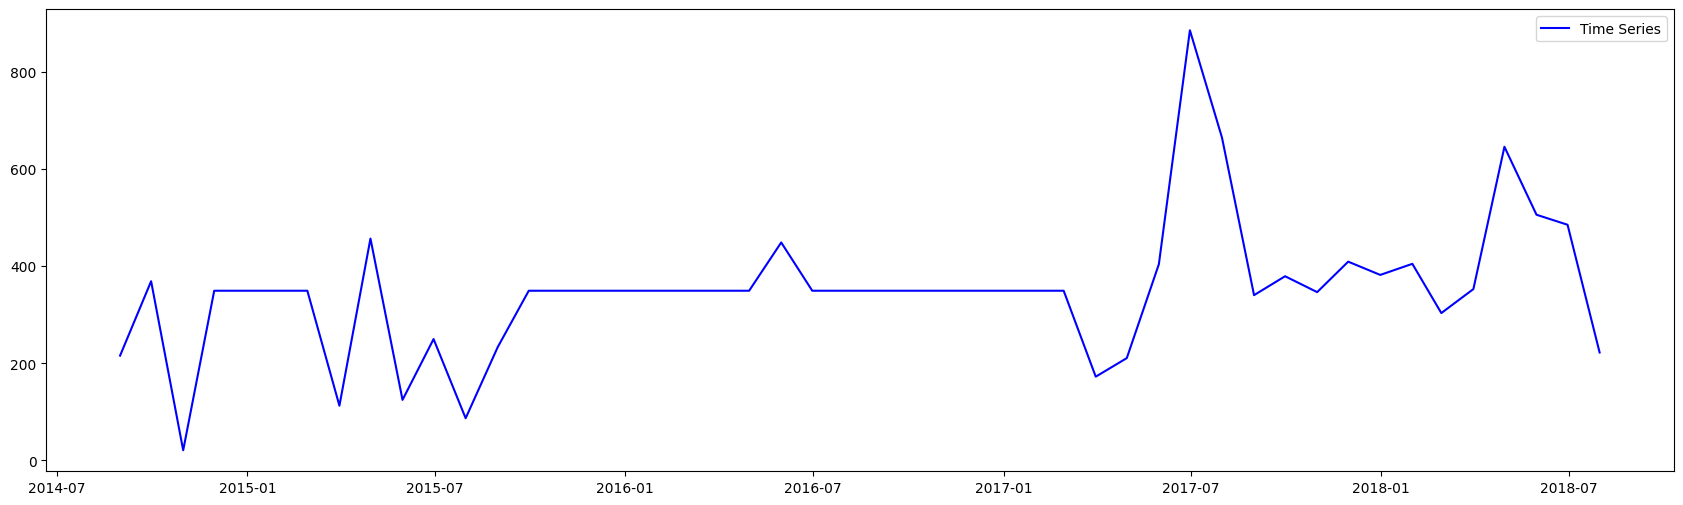

In [165]:
plt.figure(figsize=(21,6))
plt.plot(precios_medios_diarios['Precio medio'], 'b-')
plt.legend(['Time Series'])
plt.show()

Se puede observar que los precios de los artículos visitados hasta 2017 se mantiene dentro del mismo rango. A partir de esa fecha, se puede ver una gran diferencia entre aquellos precios medios de artículos visitados. Esto se debe a que la mayoría de datos de las visitas están concentrados entre los años 2017 y 2018, lo cuál nos permite ver una mayor variación en el precio medio de artículos por visitas.

##### Estacionariedad

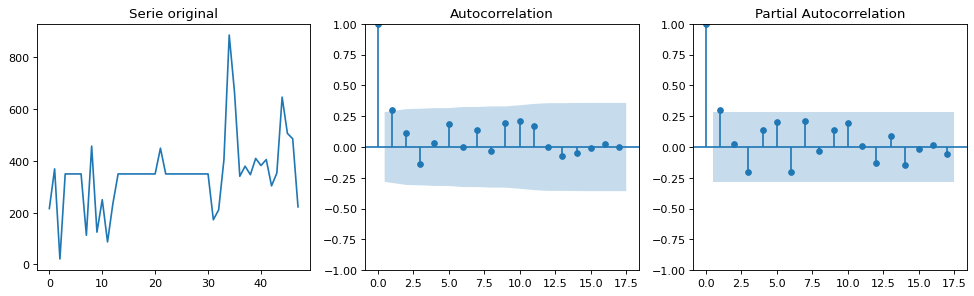

In [166]:
# Creamos gráfico
f = plt.figure(figsize=(15, 4), dpi=80)
# Preparamos primer componente
ax1 = f.add_subplot(131)
ax1.set_title('Serie original')
ax1.plot(precios_medios_diarios.values)
# Preparamos segundo componente
ax2 = f.add_subplot(132)
plot_acf(precios_medios_diarios.values, ax=ax2)
# Preparamos tercer componente
ax3 = f.add_subplot(133)
plot_pacf(precios_medios_diarios.values, ax=ax3)
plt.show()

In [167]:
# Análisis de la estacionariedad de la serie:
print(f"p-valor diferenciación orden cero: {adfuller(precios_medios_diarios)[1]}")
print(f"p-valor diferenciación orden uno: {adfuller(precios_medios_diarios.diff().dropna())[1]}")
print(f"p-valor diferenciación orden dos: {adfuller(precios_medios_diarios.diff().diff().dropna())[1]}")

p-valor diferenciación orden cero: 0.003175426974570931
p-valor diferenciación orden uno: 3.37453290465657e-08
p-valor diferenciación orden dos: 0.0006413611477003633


Tras observar los resultados, para el test Dickey-Fuller aumentada (ADF) se observa que la serie temporal sería estacionaria, no obstante, se observa cierta tendencia.

##### Búsqueda de parámetros óptimos

Obtenido de: https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/

In [168]:
def evaluate_arima_model(X, arima_order):
    # Prepare training and test datasets
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    # Make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    
    # Calculate root mean squared error (RMSE)
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# Evaluación de parámetros
p_values = range(0,3)
d_values = range(0, 3)
q_values = range(0, 3)

warnings.filterwarnings("ignore")
evaluate_models(precios_medios_diarios.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=197.205
ARIMA(0, 0, 1) RMSE=191.759
ARIMA(0, 0, 2) RMSE=217.695
ARIMA(0, 1, 0) RMSE=195.870
ARIMA(0, 1, 1) RMSE=194.976
ARIMA(0, 1, 2) RMSE=191.905
ARIMA(0, 2, 0) RMSE=266.219
ARIMA(0, 2, 1) RMSE=198.691
ARIMA(0, 2, 2) RMSE=200.289
ARIMA(1, 0, 0) RMSE=191.729
ARIMA(1, 0, 1) RMSE=197.254
ARIMA(1, 0, 2) RMSE=201.965
ARIMA(1, 1, 0) RMSE=222.403
ARIMA(1, 1, 1) RMSE=214.573
ARIMA(1, 1, 2) RMSE=191.828
ARIMA(1, 2, 0) RMSE=288.401
ARIMA(1, 2, 1) RMSE=224.951
ARIMA(1, 2, 2) RMSE=224.677
ARIMA(2, 0, 0) RMSE=201.651
ARIMA(2, 0, 1) RMSE=201.397
ARIMA(2, 0, 2) RMSE=195.139
ARIMA(2, 1, 0) RMSE=233.656
ARIMA(2, 1, 1) RMSE=200.090
ARIMA(2, 1, 2) RMSE=196.939
ARIMA(2, 2, 0) RMSE=304.684
ARIMA(2, 2, 1) RMSE=236.840
ARIMA(2, 2, 2) RMSE=228.963
Best ARIMA(1, 0, 0) RMSE=191.729


Los mejores parámetros para las predicciones con ARIMA son p=1, d=0 y q=0, los cuales producen el menor error.

In [176]:
model = ARIMA(precios_medios_diarios.values, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -303.096
Date:                Wed, 12 Jul 2023   AIC                            612.191
Time:                        10:14:59   BIC                            617.805
Sample:                             0   HQIC                           614.313
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        347.5221     29.560     11.757      0.000     289.586     405.458
ar.L1          0.3065      0.152      2.021      0.043       0.009       0.604
sigma2      1.775e+04   2182.296      8.134      0.0

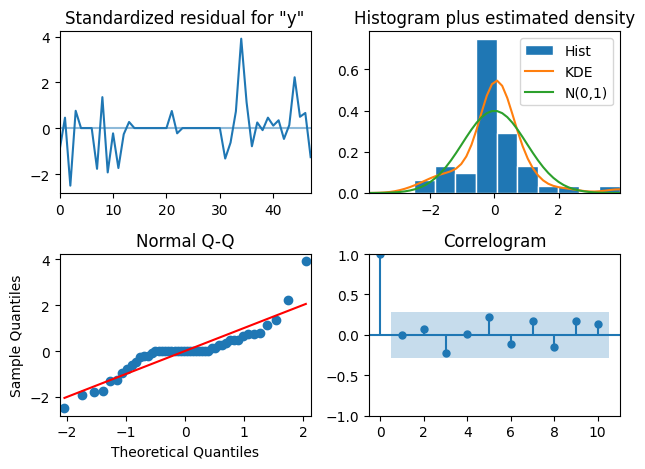

In [177]:
model_fit.plot_diagnostics()
plt.tight_layout()
plt.show()

En esta gráfica se puede ver que el error residual estaría comprendido entre 2 y -2, no estando centrado en el cero, por lo que no se puede afirmar que se ha obtenido ruido blanco al aplicar el modelo.

* Predicciones futuras con Neural Prophet:

In [150]:
precios_medios_diarios=digital.groupby('nuevas_fechas')['Precio medio'].mean().reset_index()

In [151]:
precios_medios_diarios['nuevas_fechas']=pd.to_datetime(precios_medios_diarios['nuevas_fechas'])
precios_medios_diarios.set_index('nuevas_fechas', inplace=True)

In [152]:
precios_medios_diarios=precios_medios_diarios.resample('M').mean()
precios_medios_diarios = precios_medios_diarios.fillna(precios_medios_diarios.mean(skipna=True))

In [153]:
precios_medios_diarios.reset_index(inplace=True)

In [154]:
precios_medios_diarios.rename(columns = {'nuevas_fechas':'ds', 'Precio medio':'y'}, inplace = True)
precios_medios_diarios['ds'] = pd.DatetimeIndex(precios_medios_diarios['ds'])
precios_medios_diarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      48 non-null     datetime64[ns]
 1   y       48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 896.0 bytes


In [ ]:
# Instanciamos clase
m = NeuralProphet()
# Partimos datos especificando unidad mínima de tiempo
df_train, df_val = m.split_df(precios_medios_diarios, freq='M', valid_p = 0.2)
# Entrenamos modelo
metrics = m.fit(df_train, freq='M', validation_df=df_val)

<Axes: >

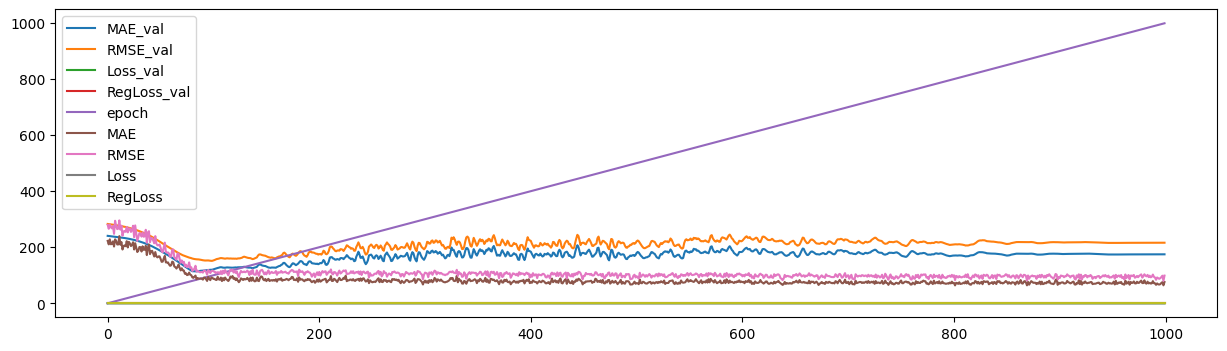

In [157]:
metrics.plot(figsize=(15,4))

In [158]:
future = m.make_future_dataframe(precios_medios_diarios, periods=24, n_historic_predictions=len(df))
forecast = m.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [97.917]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
WARNING - (NP.data.splitting._make_future_dataframe) - Insufficient data for 7249 historic forecasts, reduced to 48.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [98.611]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [98.611]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M


Predicting: 3it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [160]:
forecast['residual1']=None
for i in forecast.index:
    forecast.loc[i,'residual1']=forecast.loc[i,'y']-forecast.loc[i,'yhat1']

In [161]:
forecast.head()

ds           y       yhat1       trend  season_yearly   residual1
0 2014-08-31  215.895000  236.833466  264.913940     -28.080475  -20.938466
1 2014-09-30  369.155556  265.042206  274.684326      -9.642130   104.11335
2 2014-10-31   20.990000  210.788132  284.780426     -73.992302 -189.798132
3 2014-11-30  349.582337  309.188049  293.556183      15.631866   40.394287
4 2014-12-31  349.582337  322.032959  299.154114      22.878849   27.549378

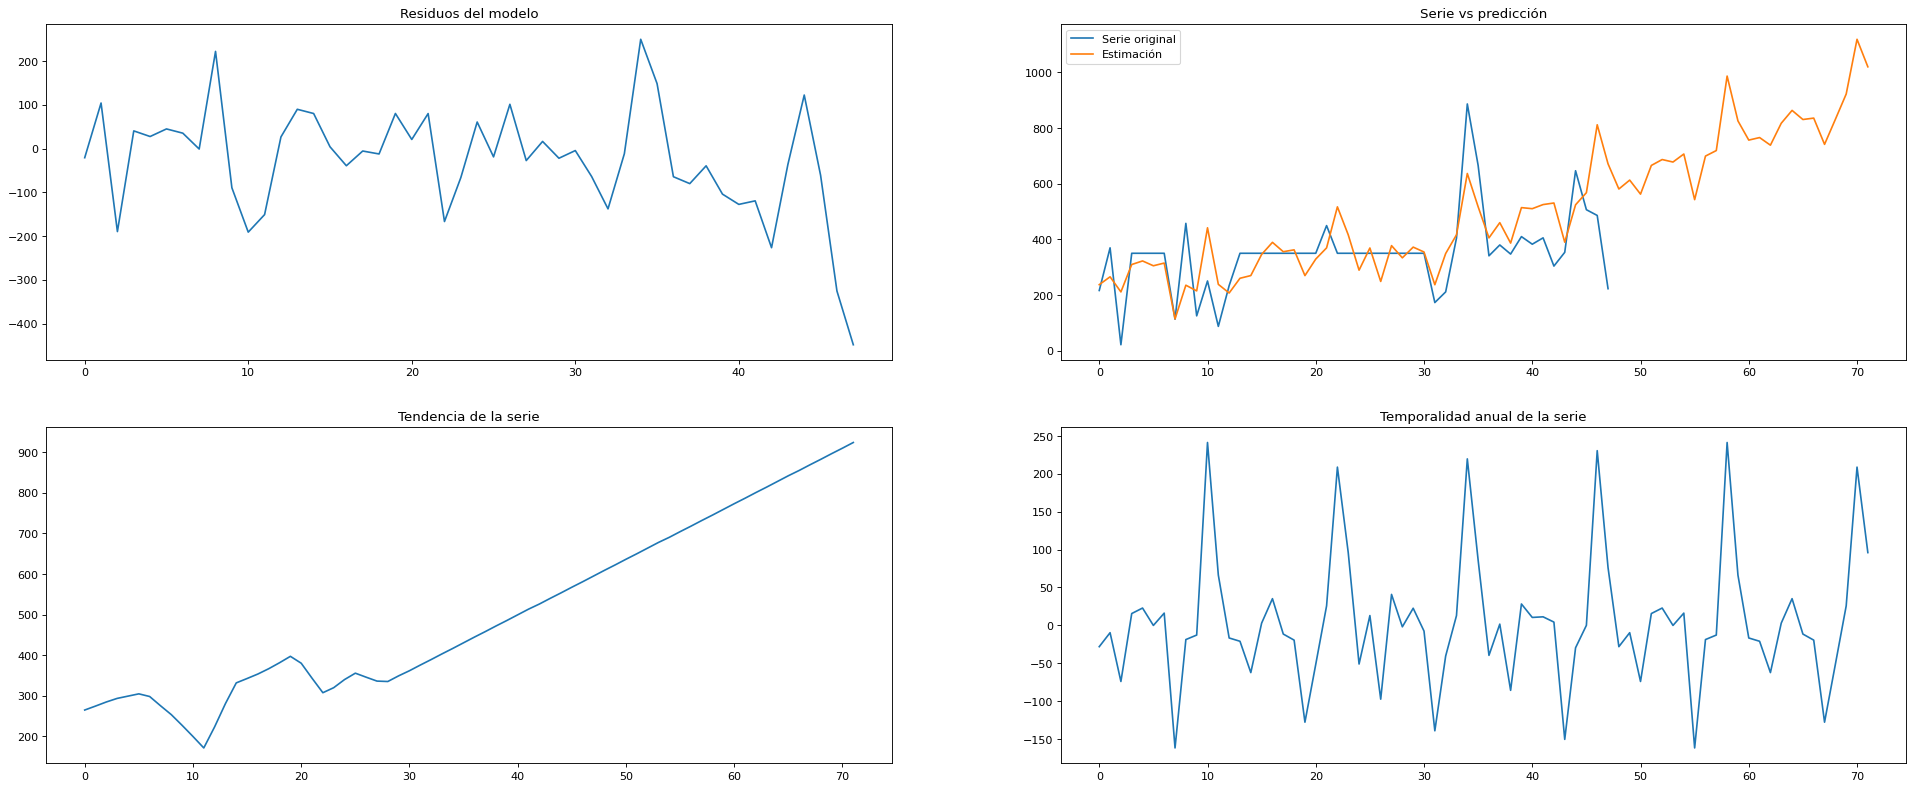

In [162]:
# Creamos gráfico
f = plt.figure(figsize=(30, 12), dpi=80)
# Preparamos primer componente - Diferencia entre el actual y predicho
ax1 = f.add_subplot(221)
ax1.set_title('Residuos del modelo')
ax1.plot(forecast['residual1'])
# Preparamos segundo componente
ax2 = f.add_subplot(222)
ax2.set_title('Serie vs predicción')
ax2.plot(forecast['y'])
ax2.plot(forecast['yhat1'])
ax2.legend(['Serie original', 'Estimación'])
# Preparamos tercer componente
ax3 = f.add_subplot(223)
ax3.set_title('Tendencia de la serie')
ax3.plot(forecast['trend'])
# Preparamos cuarto componente
ax4 = f.add_subplot(224)
ax4.set_title('Temporalidad anual de la serie')
ax4.plot(forecast['season_yearly'])

Mediante el uso de la herramienta Neural Prophet, se ha conseguido reducir el RMSE en la predicción de la serie temporal, en comparación con el obtenido para ARIMA. Tras la predicción de resultados, se obtiene un error considerablemente grande, debido a la falta de datos y a las aproximaciones realizadas, ya que los datos que se han recogido son una muestra que pertenecen a una API privada, por lo que no se ha podido estudiar la serie temporal en la totalidad de las fechas.

En base a la predicción obtenida, se podría esperar que con el paso del tiempo, el precio medio de artículos visitados mensualmente fuera en aumento, indicando un crecimiento en la posible necesidad de artículos electrónicos y en el precio de los mismos.

# Machine Learning

* Pycaret:

In [23]:
digital_class=pd.read_csv(r"C:\Users\Russhi\Desktop\BOOTCAMP\Module3_0_ProyectoFinal\digital_class.csv", sep=',')

In [10]:
from pycaret.classification import *

In [11]:
setup = setup(data = digital_class, target = 'Tienda Precio', session_id=999) 
best_model = compare_models()

In [12]:
xgboost = create_model("xgboost")

In [13]:
tuned_xgboost = tune_model(xgboost, optimize = 'Accuracy')

Initiated  . . . . . . . . . . . . . . . . . .                   08:14:16
Status     . . . . . . . . . . . . . . . . . .       Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .  Extreme Gradient Boosting

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


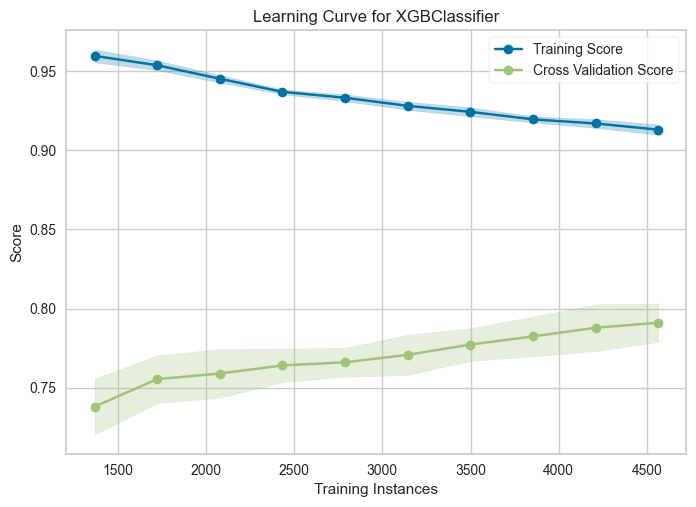

In [14]:
plot_model(tuned_xgboost, plot='learning')

In [15]:
finalize_model(tuned_xgboost)

Pipeline(memory=FastMemory(location=C:\Users\Russhi\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['prices.amountMax',
                                             'prices.amountMin',
                                             'prices.isSale'],
                                    transformer=SimpleImputer(add_indicator=Fals...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=-1, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))],
         verbose=False)

In [16]:
save_model(tuned_xgboost,'digital_class')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Russhi\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['prices.amountMax',
                                              'prices.amountMin',
                                              'prices.isSale'],
                                     transformer=SimpleImputer(add_indicator=Fals...
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
                                max_cat_to_onehot=None, max_delta_step=None,
                                max_depth=None, max_leave

In [191]:
max_price = float(input("Precio máximo del artículo visto: "))
min_price = float(input("Precio mínimo del artículo visto: "))
disponibilidad = input("'In Stock', 'Out of Stock', 'Special Order', 'More on the Way','Retired': ")
estado = input("'New', 'Refurbished', 'Used': ")
sale = input("Rebajas: yes or no ")

if sale=='yes':
    sale=1
else:
    sale=0

envio = input("'Free Standard Shipping', 'Free Expedited Shipping', 'Minimum Order Free Shipping', 'Paid Shipping': ")
cat_prim = input("'TV and accessories', 'Computer and accessories', 'Wireless Tech', 'Audio and accessories', 'Phones and accessories', 'Electronics': ")

if cat_prim=='TV and accessories':
    cat_sec = input("'TV', 'Home Theater', 'TV and accessories': ")
elif cat_prim=='Computer and accessories':
    cat_sec = input("'Computer and accessories', 'Computer', 'Discos duros': ")
elif cat_prim=='Electronics':
    cat_sec = input("'Digital camera and accessories', 'Electronics': ")
elif cat_prim=='Audio and accessories':
    cat_sec = input("'Audio and accessories', 'Audio': ")
elif cat_prim=='Phones and accessories':
    cat_sec = input("'Phones and accessories','Smart-tech': ")
else:
    cat_sec = input("'Wireless Tech': ")



def prediccion_tienda(max_price,min_price,disponibilidad,estado,sale,envio,cat_prim,cat_sec):
    data = pd.DataFrame({'prices.amountMax': [max_price], 'prices.amountMin': [min_price], 'Disponibilidad':[disponibilidad], 'Estado': [estado],
       'prices.isSale': [sale], 'Envios':[envio], 'Categoria Principal':[cat_prim],
       'secondary category':[cat_sec]})
    loaded_model = load_model('digital_class')
    prediction = predict_model(loaded_model, data=data)

    if prediction.loc[0,'prediction_label']==0:
        print('Bestbuy')
        print('Accuracy: ', prediction.loc[0,'prediction_score'])
    elif prediction.loc[0,'prediction_label']==1:
        print('Bhphotovideo')
        print('Accuracy: ', prediction.loc[0,'prediction_score'])
    elif prediction.loc[0,'prediction_label']==2:
        print('Ebay')
        print('Accuracy: ', prediction.loc[0,'prediction_score'])
    else:
        print('Walmart')
        print('Accuracy: ', prediction.loc[0,'prediction_score'])

prediccion_tienda(max_price,min_price,disponibilidad,estado,sale,envio,cat_prim,cat_sec)
    

Transformation Pipeline and Model Successfully Loaded


Walmart
Accuracy:  0.7565


* Modelos de clasificación:

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
digital_class=digital[['prices.amountMax','prices.amountMin','Disponibilidad','Estado','prices.isSale','Tienda Precio','Envios','Categoria Principal','name']].copy()

In [6]:
digital_class=digital_class[digital_class['Tienda Precio']!='autoplicity']
digital_class.reset_index(inplace=True)
#digital_class.drop('index',axis=1,inplace=True)

In [7]:
digital_class['secondary category']=None
for i,v in enumerate(digital_class['name']):
    if digital_class.loc[i,'Categoria Principal']=='TV and accessories':
        if ('TV' in v) or ('LED' in v) or ('HDTV' in v) or ('Smart' in v):
            digital_class.loc[i,'secondary category']='TV'
        elif ('Home Theater' in v) or ('Music' in v) or ('Soundbar' in v):
            digital_class.loc[i,'secondary category']='Home Theater'
        else:
            digital_class.loc[i,'secondary category']=digital_class.loc[i,'Categoria Principal']
    elif digital_class.loc[i,'Categoria Principal']=='Computer and accessories':
        if ('Desktop' in v) or ('Laptop' in v) or ('Laptops' in v) or ('Computer' in v) or ('Computers' in v):
            digital_class.loc[i,'secondary category']='Computer'
        elif ('HDD' in v) or ('SSD' in v) or ('Hard Drive' in v) or ('Solid-State Drive' in v) or ('SATA' in v) or ('Solid State Drive' in v):
            digital_class.loc[i,'secondary category']='Discos duros'
        else:
            digital_class.loc[i,'secondary category']=digital_class.loc[i,'Categoria Principal']
    elif digital_class.loc[i,'Categoria Principal']=='Audio and accessories':
        if ('Headphones' in v) or ('Speaker' in v) or ('Speakers' in v) or ('Stereo' in v) or ('Loudspeaker' in v):
            digital_class.loc[i,'secondary category']='Audio'
        else:
            digital_class.loc[i,'secondary category']=digital_class.loc[i,'Categoria Principal']
    elif digital_class.loc[i,'Categoria Principal']=='Phones and accessories':
        if ('Smartphone' in v) or ('Smartwatch' in v):
            digital_class.loc[i,'secondary category']='Smart-tech'
        else:
            digital_class.loc[i,'secondary category']=digital_class.loc[i,'Categoria Principal']
    elif digital_class.loc[i,'Categoria Principal']=='Electronics':
        if ('Camera' in v) or ('Cameras' in v) or ('Lens' in v):
            digital_class.loc[i,'secondary category']='Digital camera and accessories'
        else:
            digital_class.loc[i,'secondary category']=digital_class.loc[i,'Categoria Principal']
    else:
        digital_class.loc[i,'secondary category']=digital_class.loc[i,'Categoria Principal']
digital_class.drop(['name','index'],axis=1,inplace=True)

In [25]:
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder(drop='first', sparse_output=False)
columnas=['Disponibilidad', 'Estado', 'Envios','Categoria Principal','secondary category']
categorical_data = digital_class[columnas]
encoded_categorical_data = pd.DataFrame(encoder.fit_transform(categorical_data))
encoded_categorical_data.columns = encoder.get_feature_names_out(columnas)
digital_class = digital_class.drop(['Disponibilidad', 'Estado', 'Envios','Categoria Principal','secondary category'], axis=1)
encoded_data = pd.concat([digital_class, encoded_categorical_data], axis=1)

In [26]:
encoded_data['Tienda Precio']=encoded_data['Tienda Precio'].map({'bestbuy':0,'walmart':1,'bhphotovideo':2,'ebay':3})

In [27]:
X = encoded_data.drop(columns = ['Tienda Precio'], axis=1).copy() 
y = encoded_data['Tienda Precio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=357)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(X_train,y_train)
predictions_LR= logistic.predict(X_test)
print(logistic.score(X_train,y_train))
print(classification_report(y_test,predictions_LR))

0.7445230291530102
              precision    recall  f1-score   support

           0       0.64      0.79      0.71       533
           1       0.92      0.68      0.78       412
           2       0.79      0.81      0.80       294
           3       0.61      0.53      0.57       211

    accuracy                           0.73      1450
   macro avg       0.74      0.70      0.71      1450
weighted avg       0.74      0.73      0.73      1450



In [30]:
model_RF = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=2, min_samples_leaf=2, random_state=2)
model_RF.fit(X_train, y_train)
predictions_RF = model_RF.predict(X_test)
print(model_RF.score(X_train,y_train))
print(classification_report(y_test,predictions_RF))

0.7098499223736415
              precision    recall  f1-score   support

           0       0.55      0.82      0.66       533
           1       0.92      0.64      0.75       412
           2       0.73      0.87      0.80       294
           3       1.00      0.12      0.22       211

    accuracy                           0.68      1450
   macro avg       0.80      0.61      0.61      1450
weighted avg       0.76      0.68      0.65      1450



In [31]:
KNN_classifier = KNeighborsClassifier(n_neighbors=3)
KNN_classifier.fit(X_train, y_train)
predictions_KNN = KNN_classifier.predict(X_test)
print(KNN_classifier.score(X_train,y_train))
print(classification_report(y_test,predictions_KNN))

0.8545799551492151
              precision    recall  f1-score   support

           0       0.66      0.80      0.72       533
           1       0.86      0.73      0.79       412
           2       0.83      0.85      0.84       294
           3       0.68      0.51      0.59       211

    accuracy                           0.75      1450
   macro avg       0.76      0.72      0.73      1450
weighted avg       0.75      0.75      0.74      1450



In [32]:
model_GB_opt = GradientBoostingClassifier(learning_rate=0.5, max_depth=3,n_estimators=200, loss='deviance',
                                      subsample=1,min_samples_leaf=1,min_samples_split=4,random_state=357, validation_fraction=0.1,
                                        n_iter_no_change=5, tol=0.01)
model_GB_opt.fit(X = X_train, y = y_train)
predictions_GB = model_GB_opt.predict(X_test)
print(model_GB_opt.score(X_train,y_train))
print(classification_report(y_test,predictions_GB))

0.8061066068656202
              precision    recall  f1-score   support

           0       0.66      0.85      0.74       533
           1       0.90      0.72      0.80       412
           2       0.84      0.83      0.83       294
           3       0.76      0.50      0.60       211

    accuracy                           0.76      1450
   macro avg       0.79      0.73      0.75      1450
weighted avg       0.78      0.76      0.76      1450



In [33]:
model_XGB = XGBClassifier(learning_rate=0.005, use_label_encoder=False, n_estimators=1000, max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=30)

model_XGB.fit(X_train, y_train)
predictions_XGB = model_XGB.predict(X_test)
print(model_XGB.score(X_train,y_train))
print(classification_report(y_test,predictions_XGB))

0.768845954804209
              precision    recall  f1-score   support

           0       0.63      0.86      0.72       533
           1       0.92      0.68      0.78       412
           2       0.83      0.82      0.83       294
           3       0.74      0.45      0.56       211

    accuracy                           0.74      1450
   macro avg       0.78      0.70      0.72      1450
weighted avg       0.77      0.74      0.74      1450



* Determinación de hiperparámetros para Gradient Boosting Classifier mediante Wandb:

In [34]:
model_GB_opt2 = GradientBoostingClassifier(learning_rate=0.5, max_depth=5,n_estimators=200, loss='deviance',
                                      subsample=1,min_samples_leaf=2,min_samples_split=6,random_state=888, validation_fraction=0.1,
                                        n_iter_no_change=5, tol=0.01)
model_GB_opt2.fit(X = X_train, y = y_train)
predictions_GB = model_GB_opt2.predict(X_test)
print(model_GB_opt2.score(X_train,y_train))
print(classification_report(y_test,predictions_GB))

0.8528549249611869
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       533
           1       0.92      0.74      0.82       412
           2       0.84      0.85      0.84       294
           3       0.73      0.59      0.65       211

    accuracy                           0.78      1450
   macro avg       0.79      0.76      0.77      1450
weighted avg       0.79      0.78      0.78      1450



In [184]:
max_price = float(input("Precio máximo del artículo visto: "))
min_price = float(input("Precio mínimo del artículo visto: "))
disponibilidad = input("'In Stock', 'Out of Stock', 'Special Order', 'More on the Way','Retired': ")
estado = input("'New', 'Refurbished', 'Used': ")
sale = input("Rebajas: yes or no ")
envio = input("'Free Standard Shipping', 'Free Expedited Shipping', 'Minimum Order Free Shipping', 'Paid Shipping': ")
cat_prim = input("'TV and accessories', 'Computer and accessories', 'Wireless Tech', 'Audio and accessories', 'Phones and accessories', 'Electronics': ")

if cat_prim=='TV and accessories':
    cat_sec = input("'TV', 'Home Theater', 'TV and accessories': ")
elif cat_prim=='Computer and accessories':
    cat_sec = input("'Computer and accessories', 'Computer', 'Discos duros': ")
elif cat_prim=='Electronics':
    cat_sec = input("'Digital camera and accessories', 'Electronics': ")
elif cat_prim=='Audio and accessories':
    cat_sec = input("'Audio and accessories', 'Audio': ")
elif cat_prim=='Phones and accessories':
    cat_sec = input("'Phones and accessories','Smart-tech': ")
else:
    cat_sec = input("'Wireless Tech': ")



def prediccion_tienda(max_price,min_price,disponibilidad,estado,sale,envio,cat_prim,cat_sec):
    data = pd.DataFrame(columns=['prices.amountMax', 'prices.amountMin', 'prices.isSale',
       'Disponibilidad_More on the Way',
       'Disponibilidad_Out of Stock', 'Disponibilidad_Retired',
       'Disponibilidad_Special Order', 'Estado_Refurbished', 'Estado_Used',
       'Envios_Free Standard Shipping', 'Envios_Minimum Order Free Shipping',
       'Envios_Paid Shipping', 'Categoria Principal_Computer and accessories',
       'Categoria Principal_Electronics',
       'Categoria Principal_Phones and accessories',
       'Categoria Principal_TV and accessories',
       'Categoria Principal_Wireless Tech',
       'secondary category_Audio and accessories',
       'secondary category_Computer',
       'secondary category_Computer and accessories',
       'secondary category_Digital camera and accessories',
       'secondary category_Discos duros', 'secondary category_Electronics',
       'secondary category_Home Theater',
       'secondary category_Phones and accessories',
       'secondary category_Smart-tech', 'secondary category_TV',
       'secondary category_TV and accessories',
       'secondary category_Wireless Tech'])
    
    maxp_std=(max_price-1.0)/(6999.99-1.0)
    data.loc[0,'prices.amountMax']= maxp_std * (1-0) + 0
    minp_std=(min_price-1.0)/(5999.99-1.0)
    data.loc[0,'prices.amountMin']= minp_std * (1-0) + 0

    if sale=='yes':
        data.loc[0,'prices.isSale']=1
    else:
        data.loc[0,'prices.isSale']=0

    if disponibilidad=='In Stock':
        data.loc[0,['Disponibilidad_More on the Way','Disponibilidad_Out of Stock', 'Disponibilidad_Retired','Disponibilidad_Special Order']] =[0,0,0,0]
    elif disponibilidad=='Out of Stock':
        data.loc[0,['Disponibilidad_More on the Way','Disponibilidad_Out of Stock', 'Disponibilidad_Retired','Disponibilidad_Special Order']] =[0,1,0,0]
    elif disponibilidad=='Special Order':
        data.loc[0,['Disponibilidad_More on the Way','Disponibilidad_Out of Stock', 'Disponibilidad_Retired','Disponibilidad_Special Order']] =[0,0,0,1]
    elif disponibilidad=='More on the Way':
        data.loc[0,['Disponibilidad_More on the Way','Disponibilidad_Out of Stock', 'Disponibilidad_Retired','Disponibilidad_Special Order']] =[1,0,0,0]
    else:
        data.loc[0,['Disponibilidad_More on the Way','Disponibilidad_Out of Stock', 'Disponibilidad_Retired','Disponibilidad_Special Order']] =[0,0,1,0]

    if estado=='New':
        data.loc[0,['Estado_Refurbished', 'Estado_Used']]=[0,0]
    elif estado=='Refurbished':
        data.loc[0, ['Estado_Refurbished', 'Estado_Used']] = [1, 0]
    else:
        data.loc[0, ['Estado_Refurbished', 'Estado_Used']] = [0, 1]

    if envio=='Free Expedited Shipping':
        data.loc[0,['Envios_Free Standard Shipping', 'Envios_Minimum Order Free Shipping','Envios_Paid Shipping']]=[0,0,0]
    elif envio=='Free Standard Shipping':
        data.loc[0,['Envios_Free Standard Shipping', 'Envios_Minimum Order Free Shipping','Envios_Paid Shipping']]=[1,0,0]
    elif envio=='Minimum Order Free Shipping':
        data.loc[0,['Envios_Free Standard Shipping', 'Envios_Minimum Order Free Shipping','Envios_Paid Shipping']]=[0,1,0]
    else:
        data.loc[0,['Envios_Free Standard Shipping', 'Envios_Minimum Order Free Shipping','Envios_Paid Shipping']]=[0,0,1]
    
    if cat_prim=='Audio and accessories':
        data.loc[0,['Categoria Principal_Computer and accessories','Categoria Principal_Electronics',
       'Categoria Principal_Phones and accessories','Categoria Principal_TV and accessories',
       'Categoria Principal_Wireless Tech']]=[0,0,0,0,0]
    elif cat_prim=='Computer and accessories':
        data.loc[0,['Categoria Principal_Computer and accessories','Categoria Principal_Electronics',
       'Categoria Principal_Phones and accessories','Categoria Principal_TV and accessories',
       'Categoria Principal_Wireless Tech']]=[1,0,0,0,0]
    elif cat_prim=='Electronics':
        data.loc[0,['Categoria Principal_Computer and accessories','Categoria Principal_Electronics',
       'Categoria Principal_Phones and accessories','Categoria Principal_TV and accessories',
       'Categoria Principal_Wireless Tech']]=[0,1,0,0,0]
    elif cat_prim=='Phones and accessories':
        data.loc[0,['Categoria Principal_Computer and accessories','Categoria Principal_Electronics',
       'Categoria Principal_Phones and accessories','Categoria Principal_TV and accessories',
       'Categoria Principal_Wireless Tech']]=[0,0,1,0,0]
    elif cat_prim=='TV and accessories':
        data.loc[0,['Categoria Principal_Computer and accessories','Categoria Principal_Electronics',
       'Categoria Principal_Phones and accessories','Categoria Principal_TV and accessories',
       'Categoria Principal_Wireless Tech']]=[0,0,0,1,0]
    else:
        data.loc[0,['Categoria Principal_Computer and accessories','Categoria Principal_Electronics',
       'Categoria Principal_Phones and accessories','Categoria Principal_TV and accessories',
       'Categoria Principal_Wireless Tech']]=[0,0,0,0,1]
    
    if cat_sec=='Audio and accessories':
        data.loc[0,['secondary category_Audio and accessories','secondary category_Computer',
       'secondary category_Computer and accessories','secondary category_Digital camera and accessories',
       'secondary category_Discos duros', 'secondary category_Electronics',
       'secondary category_Home Theater',
       'secondary category_Phones and accessories',
       'secondary category_Smart-tech', 'secondary category_TV',
       'secondary category_TV and accessories',
       'secondary category_Wireless Tech']]=[1,0,0,0,0,0,0,0,0,0,0,0]
    elif cat_sec=='Computer':
        data.loc[0,['secondary category_Audio and accessories','secondary category_Computer',
       'secondary category_Computer and accessories','secondary category_Digital camera and accessories',
       'secondary category_Discos duros', 'secondary category_Electronics',
       'secondary category_Home Theater',
       'secondary category_Phones and accessories',
       'secondary category_Smart-tech', 'secondary category_TV',
       'secondary category_TV and accessories',
       'secondary category_Wireless Tech']]=[0,1,0,0,0,0,0,0,0,0,0,0]
    elif cat_sec=='Computer and accessories':
        data.loc[0,['secondary category_Audio and accessories','secondary category_Computer',
       'secondary category_Computer and accessories','secondary category_Digital camera and accessories',
       'secondary category_Discos duros', 'secondary category_Electronics',
       'secondary category_Home Theater',
       'secondary category_Phones and accessories',
       'secondary category_Smart-tech', 'secondary category_TV',
       'secondary category_TV and accessories',
       'secondary category_Wireless Tech']]=[0,0,1,0,0,0,0,0,0,0,0,0]
    elif cat_sec=='Digital camera and accessories':
        data.loc[0,['secondary category_Audio and accessories','secondary category_Computer',
       'secondary category_Computer and accessories','secondary category_Digital camera and accessories',
       'secondary category_Discos duros', 'secondary category_Electronics',
       'secondary category_Home Theater',
       'secondary category_Phones and accessories',
       'secondary category_Smart-tech', 'secondary category_TV',
       'secondary category_TV and accessories',
       'secondary category_Wireless Tech']]=[0,0,0,1,0,0,0,0,0,0,0,0]
    elif cat_sec=='Discos duros':
        data.loc[0,['secondary category_Audio and accessories','secondary category_Computer',
       'secondary category_Computer and accessories','secondary category_Digital camera and accessories',
       'secondary category_Discos duros', 'secondary category_Electronics',
       'secondary category_Home Theater',
       'secondary category_Phones and accessories',
       'secondary category_Smart-tech', 'secondary category_TV',
       'secondary category_TV and accessories',
       'secondary category_Wireless Tech']]=[0,0,0,0,1,0,0,0,0,0,0,0]
    elif cat_sec=='Electronics':
        data.loc[0,['secondary category_Audio and accessories','secondary category_Computer',
       'secondary category_Computer and accessories','secondary category_Digital camera and accessories',
       'secondary category_Discos duros', 'secondary category_Electronics',
       'secondary category_Home Theater',
       'secondary category_Phones and accessories',
       'secondary category_Smart-tech', 'secondary category_TV',
       'secondary category_TV and accessories',
       'secondary category_Wireless Tech']]=[0,0,0,0,0,1,0,0,0,0,0,0]
    elif cat_sec=='Home Theater':
        data.loc[0,['secondary category_Audio and accessories','secondary category_Computer',
       'secondary category_Computer and accessories','secondary category_Digital camera and accessories',
       'secondary category_Discos duros', 'secondary category_Electronics',
       'secondary category_Home Theater',
       'secondary category_Phones and accessories',
       'secondary category_Smart-tech', 'secondary category_TV',
       'secondary category_TV and accessories',
       'secondary category_Wireless Tech']]=[0,0,0,0,0,0,1,0,0,0,0,0]
    elif cat_sec=='Phones and accessories':
        data.loc[0,['secondary category_Audio and accessories','secondary category_Computer',
       'secondary category_Computer and accessories','secondary category_Digital camera and accessories',
       'secondary category_Discos duros', 'secondary category_Electronics',
       'secondary category_Home Theater',
       'secondary category_Phones and accessories',
       'secondary category_Smart-tech', 'secondary category_TV',
       'secondary category_TV and accessories',
       'secondary category_Wireless Tech']]=[0,0,0,0,0,0,0,1,0,0,0,0]
    elif cat_sec=='Smart-tech':
        data.loc[0,['secondary category_Audio and accessories','secondary category_Computer',
       'secondary category_Computer and accessories','secondary category_Digital camera and accessories',
       'secondary category_Discos duros', 'secondary category_Electronics',
       'secondary category_Home Theater',
       'secondary category_Phones and accessories',
       'secondary category_Smart-tech', 'secondary category_TV',
       'secondary category_TV and accessories',
       'secondary category_Wireless Tech']]=[0,0,0,0,0,0,0,0,1,0,0,0]
    elif cat_sec=='TV':
        data.loc[0,['secondary category_Audio and accessories','secondary category_Computer',
       'secondary category_Computer and accessories','secondary category_Digital camera and accessories',
       'secondary category_Discos duros', 'secondary category_Electronics',
       'secondary category_Home Theater',
       'secondary category_Phones and accessories',
       'secondary category_Smart-tech', 'secondary category_TV',
       'secondary category_TV and accessories',
       'secondary category_Wireless Tech']]=[0,0,0,0,0,0,0,0,0,1,0,0]
    elif cat_sec=='TV and accessories':
        data.loc[0,['secondary category_Audio and accessories','secondary category_Computer',
       'secondary category_Computer and accessories','secondary category_Digital camera and accessories',
       'secondary category_Discos duros', 'secondary category_Electronics',
       'secondary category_Home Theater',
       'secondary category_Phones and accessories',
       'secondary category_Smart-tech', 'secondary category_TV',
       'secondary category_TV and accessories',
       'secondary category_Wireless Tech']]=[0,0,0,0,0,0,0,0,0,0,1,0]
    elif cat_sec=='Wireless Tech':
        data.loc[0,['secondary category_Audio and accessories','secondary category_Computer',
       'secondary category_Computer and accessories','secondary category_Digital camera and accessories',
       'secondary category_Discos duros', 'secondary category_Electronics',
       'secondary category_Home Theater',
       'secondary category_Phones and accessories',
       'secondary category_Smart-tech', 'secondary category_TV',
       'secondary category_TV and accessories',
       'secondary category_Wireless Tech']]=[0,0,0,0,0,0,0,0,0,0,0,1]
    else:
        data.loc[0,['secondary category_Audio and accessories','secondary category_Computer',
       'secondary category_Computer and accessories','secondary category_Digital camera and accessories',
       'secondary category_Discos duros', 'secondary category_Electronics',
       'secondary category_Home Theater',
       'secondary category_Phones and accessories',
       'secondary category_Smart-tech', 'secondary category_TV',
       'secondary category_TV and accessories',
       'secondary category_Wireless Tech']]=[0,0,0,0,0,0,0,0,0,0,0,0]
        
    predictions_GB = model_GB_opt2.predict(data)

    if predictions_GB==0:
        tienda='Bestbuy'
    elif predictions_GB==1:
        tienda='Walmart'
    elif predictions_GB==2:
        tienda='Bhphotovideo'
    else:
        tienda='Ebay'

    return tienda

prediction=prediccion_tienda(max_price,min_price,disponibilidad,estado,sale,envio,cat_prim,cat_sec)

prediction

'Walmart'